## Problem Statement - Unsupervised Learning Project- Coded

### Context
All Life Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 
### Objective

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

Data Dictionary
- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that the customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)
                                                                                                                                                                                                                               
### Problem Definition                                                                                                                                                                                                                              
 
-   The goal is to segment the existing customer base based on spending patterns and past interactions with the bank. This segmentation will allow the bank to:
-	Run personalized marketing campaigns to attract new customers and increase spending by existing ones.
-	Improve customer support by understanding which segments are more likely to perceive the service negatively and upgrade the service delivery model accordingly.
-	Use clustering techniques (KMeans, Hierarchical Clustering) to group customers.
-	Apply Elbow Method and Silhouette Scores to determine optimal clusters.
-	Targeted campaigns for better customer acquisition and retention.
-	Improved customer service tailored to specific segments.
-	Increased revenue through personalized marketing and better customer support.



## Importing necessary libraries

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering


# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Reading the Dataset

In [3]:
# loading the dataset
data = pd.read_excel("Credit+Card+Customer+Data.xlsx")

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [4]:
data.shape

(660, 7)

* The dataset has 660 rows and 7 columns

### Displaying few rows of the dataset

In [5]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


### Creating a copy of original data

In [6]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [7]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

### Checking the data types of the columns for the dataset

In [8]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


* There are 7 attributes which are int64.
* There is no missing values.

### Feature Engineering

**We won't need serial. No. for analysis, so let's drop this column.**

In [9]:
df.drop("Sl_No", axis=1, inplace=True)
print(df.columns)

Index(['Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


### Checking for duplicates and dropping those

In [10]:
# let's check for duplicate observations
df.duplicated().sum()

0

- There are no duplicate observations. 

In [11]:
#To get the value counts of Customer Key
df['Customer_Key'].value_counts()

Customer_Key
97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: count, Length: 655, dtype: int64

In [12]:
# Check for duplicates based on the 'Customer_Key' column only
customer_key_duplicates = df.duplicated(subset=['Customer_Key']).sum()

# Display the count of duplicate Customer_Key values
print("Total number of duplicate Customer_Key values:", customer_key_duplicates)

Total number of duplicate Customer_Key values: 5


In [13]:
df[df['Customer_Key'] == 47437]

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0


In [14]:
df[df['Customer_Key'] == 37252]

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2


In [15]:
df[df['Customer_Key'] == 97935]

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


In [16]:
df[df['Customer_Key'] == 96929 ]

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2


In [17]:
df[df['Customer_Key'] == 50706 ]

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2


In [18]:
df.duplicated().sum()

0

### Statistical summary of the dataset

In [19]:
df.describe()

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


### Observation: 
### Customer Key:
- As you noted, this column serves as a unique identifier for each customer, similar to an ID, and will not be useful as a feature for clustering.


### Average Credit Limit:

* The average credit limit across customers is about 34,574, with a minimum of 3,000 and a maximum of 200,000.
* There’s a wide range in credit limits, which could indicate different levels of financial capacity or spending power among customers.
### Total Credit Cards:

* Customers have, on average, 4.7 credit cards, with a range of 1 to 10.
* The distribution here may help identify customers with higher engagement or loyalty to the bank.
### Total Visits to Bank:

* The mean number of visits is 2.4, with a maximum of 5.
* Some customers do not visit the bank at all (minimum = 0), which might indicate a preference for digital or remote interactions.
### Total Online Visits:

* The average is 2.6, with a maximum of 15.
* The large range here may signify a group of customers who are more digitally active and comfortable with online interactions.
### Total Calls Made:

* The average number of calls made is 3.58, with some customers never calling (minimum = 0) and others making up to 10 calls.
* This could help identify customers with higher support needs.

In [20]:
# let's check how many products have Total_visits_bank 0
(df.Total_visits_bank == 0).sum()

100

In [21]:
# let's check the products which have listing price 0
df[(df.Total_visits_bank == 0)]

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,38414,50000,3,0,10,9
4,47437,100000,6,0,12,3
5,58634,20000,3,0,1,8
6,48370,100000,5,0,11,2
7,37376,15000,3,0,1,1
...,...,...,...,...,...,...
645,48762,171000,10,0,15,0
646,58392,186000,7,0,8,1
647,79953,183000,9,0,9,2
653,51826,95000,10,0,15,1


- There are 100 customers who havent visited banks once

In [22]:
# let's check how many products have Total_visits_online 0
(df.Total_visits_online == 0).sum()

144

* There are 144 customers who havent done online logins made by the customer (yearly)

In [23]:
# let's check how many products have Total_visits_bank 0
(df.Total_calls_made == 0).sum()

97

* There are 97 customers who havent done calls made by the customer to the bank or its customer service department (yearly) 

In [24]:
# Filter customers who haven't visited the bank and haven't made any phone calls
no_visits_no_calls = df[(df['Total_visits_bank'] == 0) & (df['Total_calls_made'] == 0)].shape[0]
# Display the total count
print("Total number of customers who didn't visit the bank and didn't make any phone calls:",no_visits_no_calls )

Total number of customers who didn't visit the bank and didn't make any phone calls: 7


In [25]:
no_visits_no_calls = df[(df['Total_visits_bank'] == 0) & (df['Total_calls_made'] == 0)]

# Display the filtered data
print(no_visits_no_calls)

     Customer_Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
617         98216            136000                   8                  0   
619         47650            158000                   7                  0   
623         32584            166000                  10                  0   
624         97285            178000                   7                  0   
630         33837            200000                  10                  0   
631         14916            195000                   8                  0   
645         48762            171000                  10                  0   

     Total_visits_online  Total_calls_made  
617                   13                 0  
619                   13                 0  
623                    7                 0  
624                   11                 0  
630                   13                 0  
631                   15                 0  
645                   15                 0  


In [26]:
# Filter customers who haven't visited the bank and haven't made any phone calls
no_visits_no_online = df[(df['Total_visits_bank'] == 0) & (df['Total_visits_online'] == 0)].shape[0]
# Display the total count
print("Total number of customers who didn't visit the bank and didn't visit online:",no_visits_no_online )

Total number of customers who didn't visit the bank and didn't visit online: 0


In [27]:
no_visits_no_online = df[(df['Total_visits_bank'] == 0) & (df['Total_visits_online'] == 0)]

# Display the filtered data
print(no_visits_no_online)

Empty DataFrame
Columns: [Customer_Key, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made]
Index: []


In [28]:
# Filter customers who haven't visited the bank and haven't made any phone calls
no_calls_no_online = df[(df['Total_calls_made'] == 0) & (df['Total_visits_online'] == 0)].shape[0]
# Display the total count
print("Total number of customers who didn't call to the bank and didn't visit online:",no_calls_no_online )

Total number of customers who didn't call to the bank and didn't visit online: 30


In [29]:
no_calls_no_online = df[(df['Total_calls_made'] == 0) & (df['Total_visits_online'] == 0)]

# Display the filtered data
print(no_calls_no_online)

     Customer_Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
228         54838             10000                   7                  2   
235         83290             13000                   7                  4   
239         14263             16000                   5                  2   
263         47496             14000                   4                  2   
266         67193             20000                   7                  5   
268         97109             17000                   6                  5   
281         21233             14000                   7                  2   
286         49418              8000                   4                  5   
297         85337              7000                   7                  4   
300         92956             15000                   6                  5   
306         31384             19000                   6                  3   
311         91987             10000                   6         

In [30]:
# checking missing values
df.isna().sum()

Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in the data.

## Exploratory Data Analysis

### Univariate Analysis

In [31]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

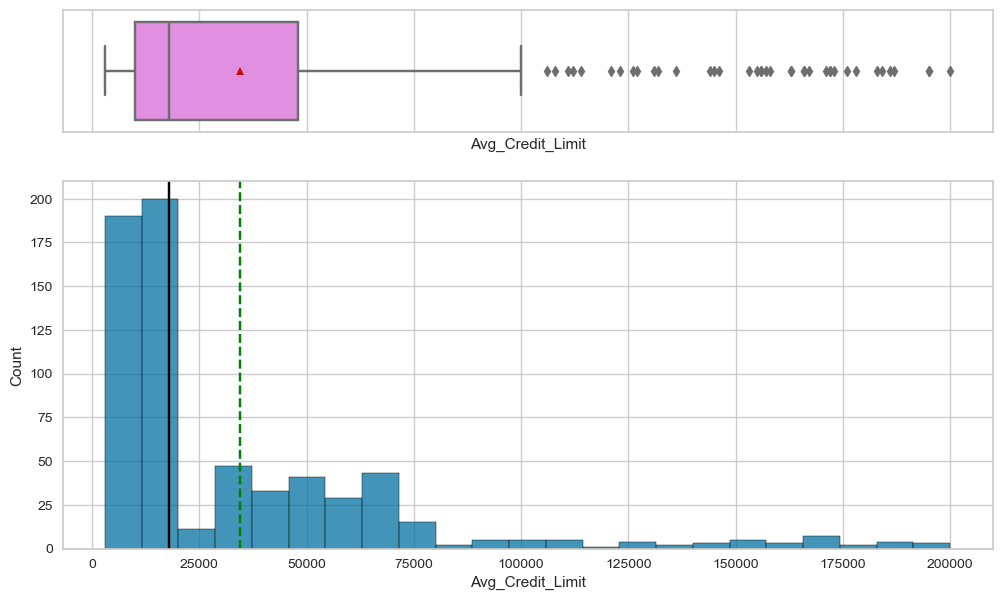

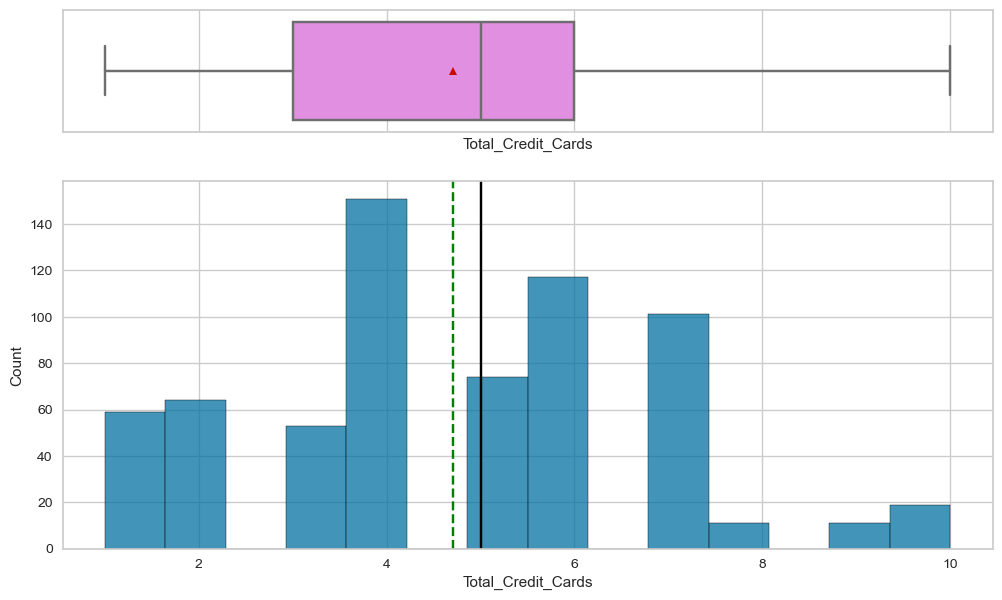

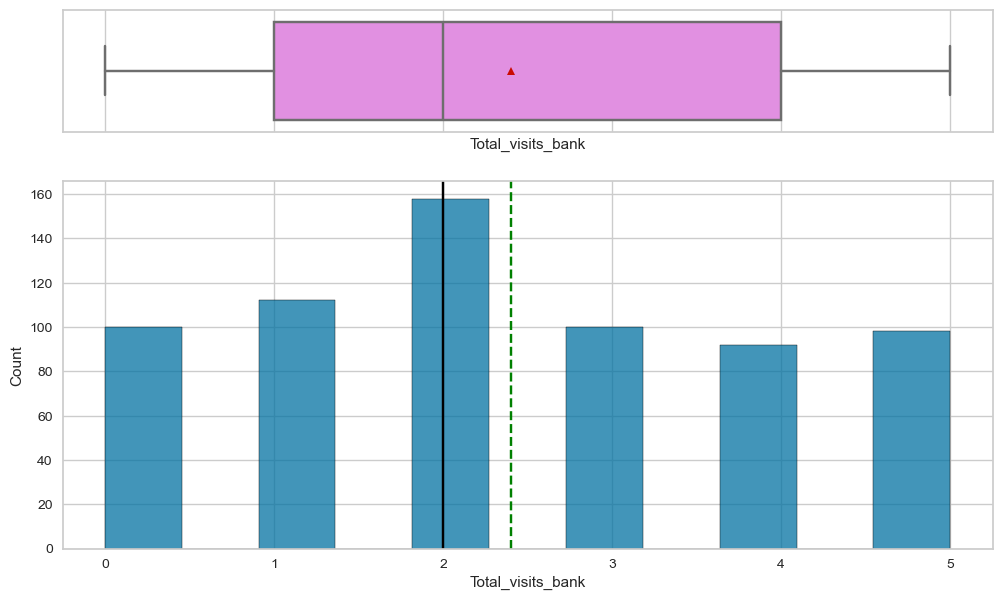

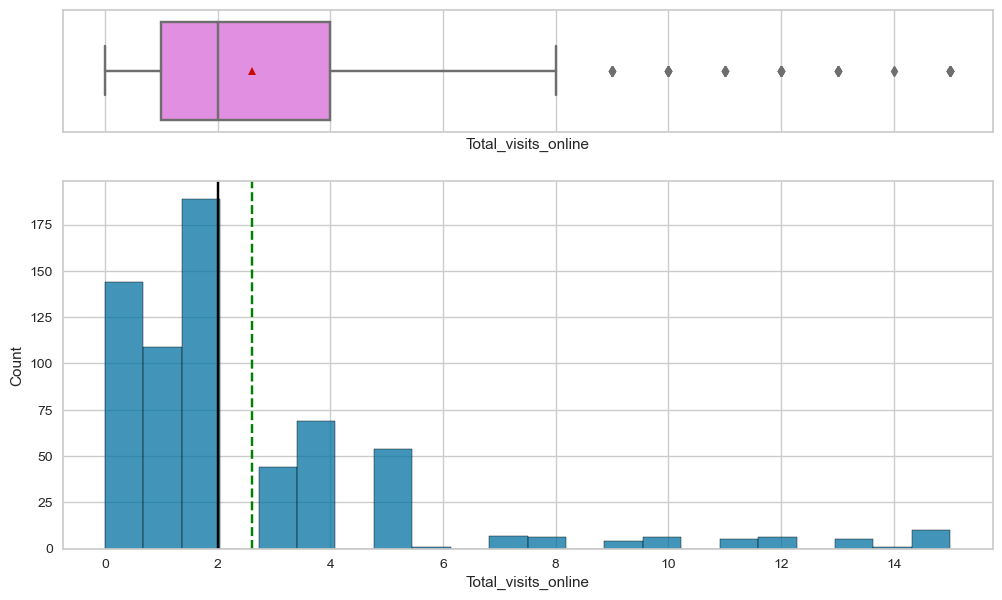

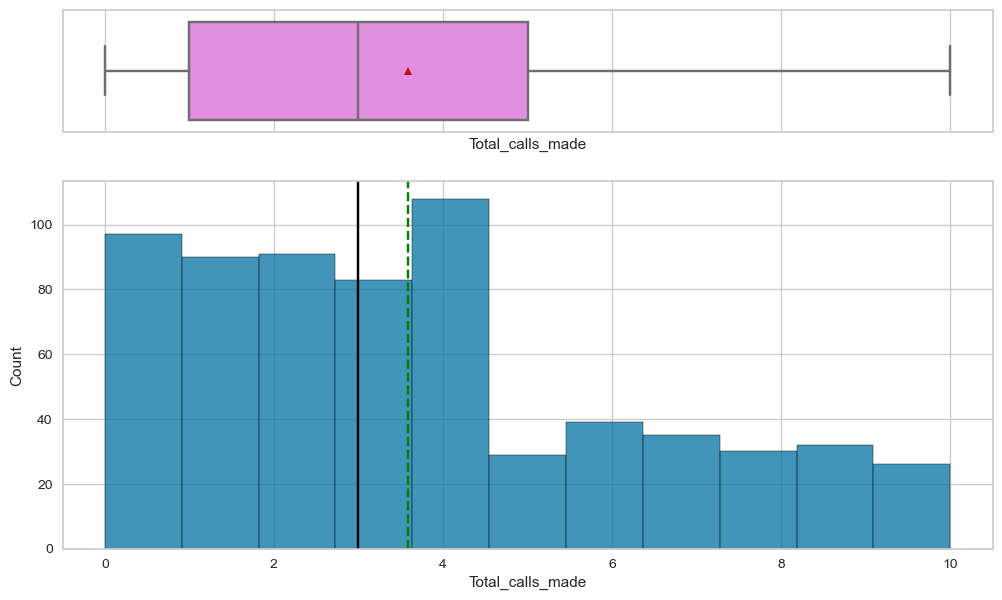

In [32]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
# Remove a specific column
num_col.remove('Customer_Key')
for item in num_col:
    histogram_boxplot(df, item)

**Observations**

- Credit Limit: Skewed to the right, with most customers having credit limits under 50,000. Several high-limit outliers push the mean higher.
- Credit Cards: The number of credit cards is fairly symmetrical, with most customers holding 4 to 6 cards.
- Bank Visits: Slightly right-skewed, with most customers visiting the bank 2 or fewer times. Many customers do not visit the bank at all.
#### Total Calls Made:
- Most customers make 0 to 5 calls, with the median at 3.5 calls.
- Very few customers make more than 5 calls, and no extreme outliers are present.
- Call activity is generally consistent, with a slight preference for making fewer calls.
#### Total Visits Online:
- The majority of customers have 0 to 2 online visits, with a median of 2 visits.
- A few customers have high online engagement (outliers with more than 8 visits), though they are a small minority.
- Most customers use online services sparingly, indicating either low need or preference for other service channels.

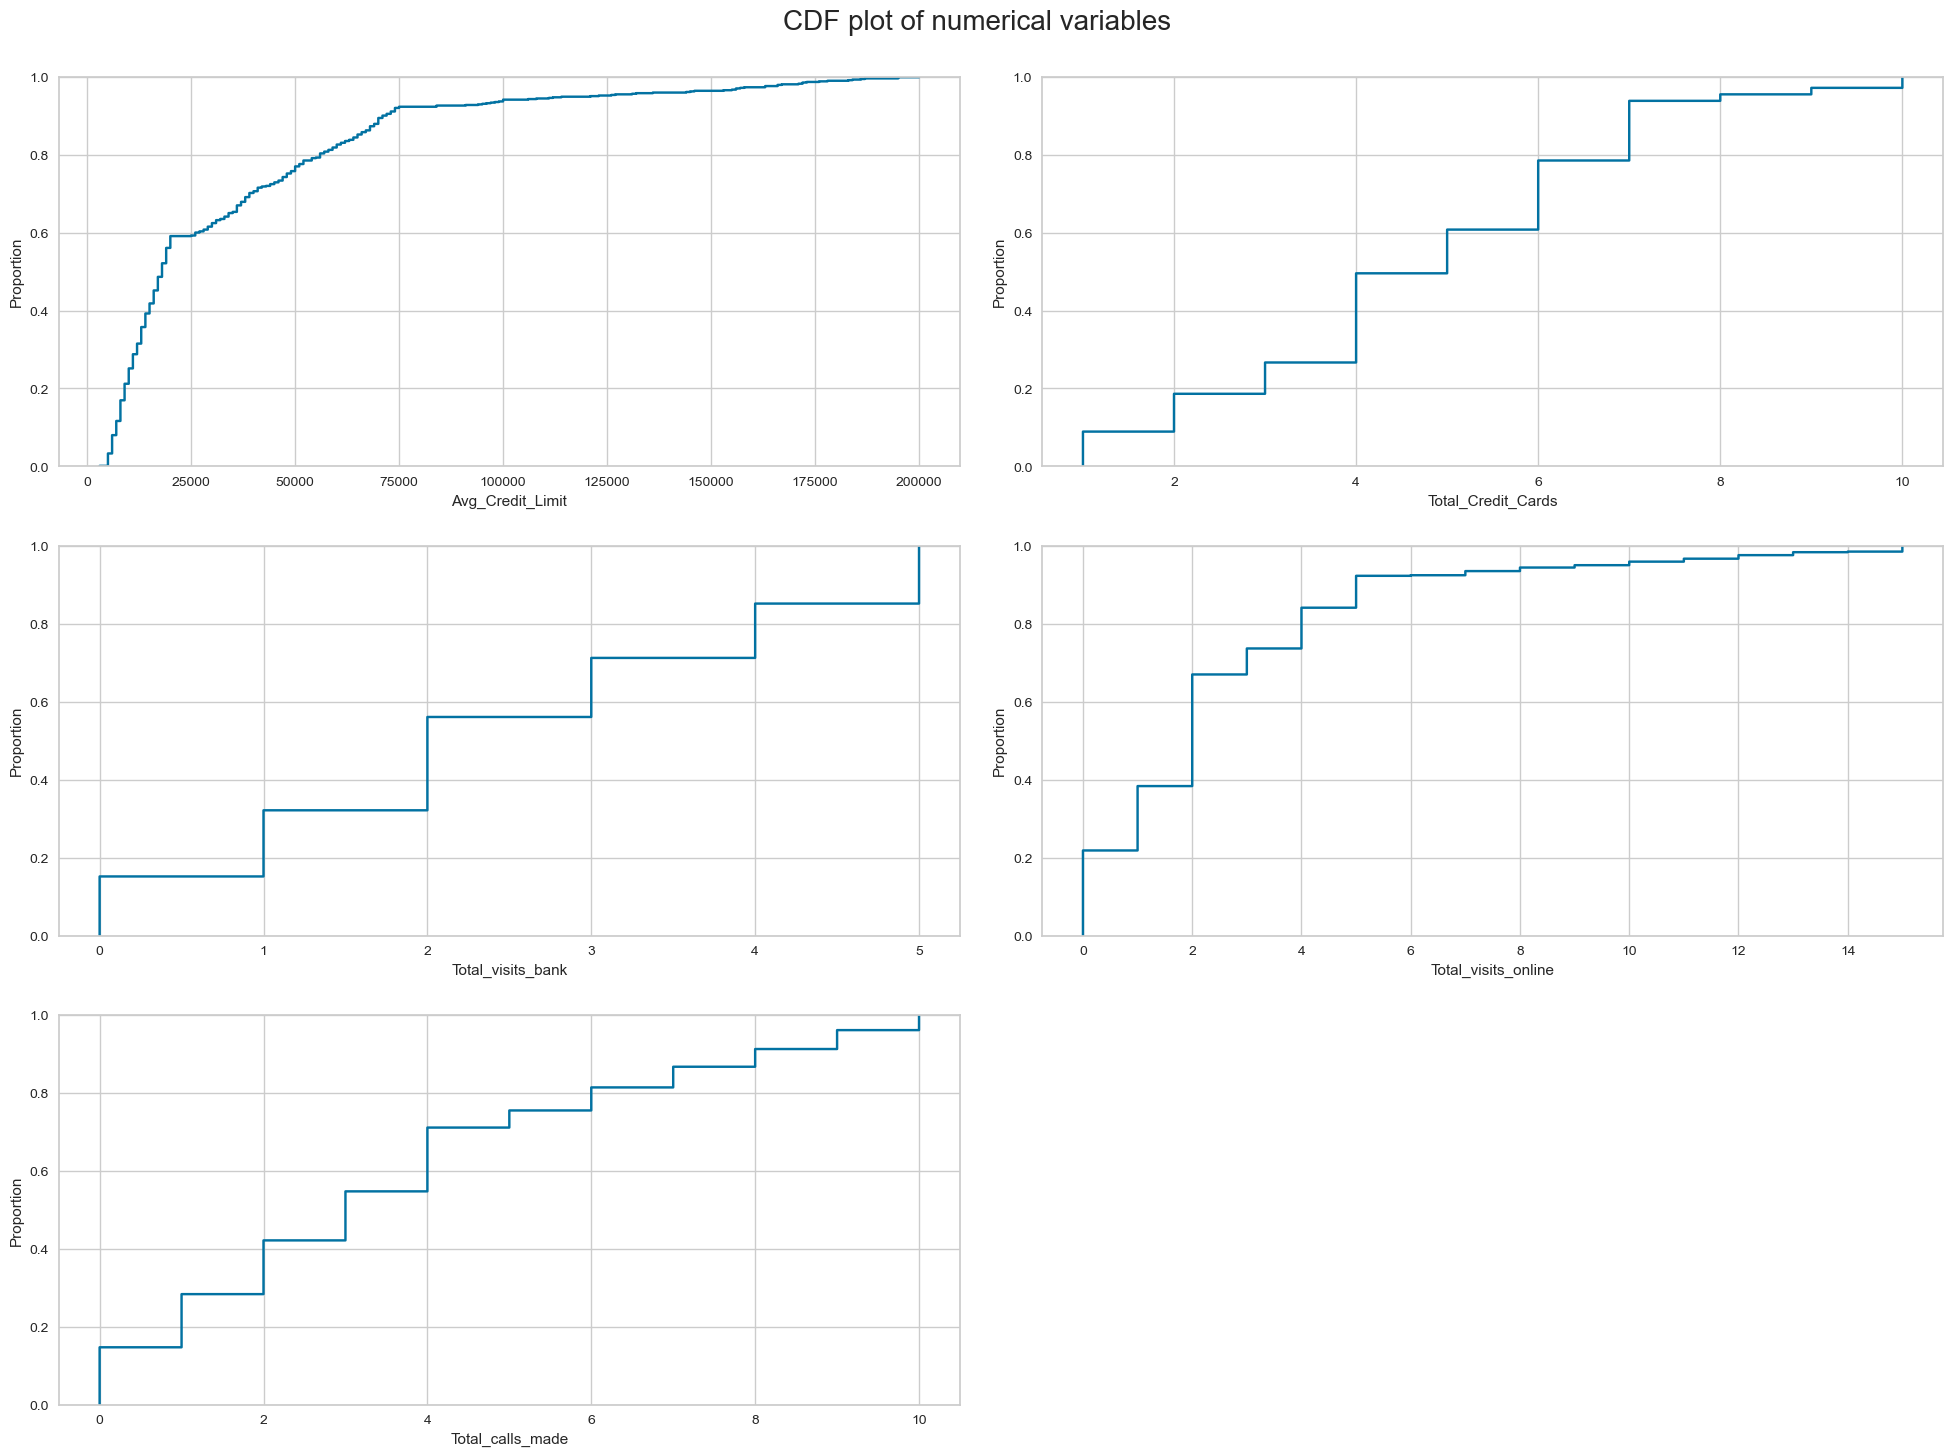

In [33]:

fig, axes = plt.subplots(3,2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass
axes[2,1].set_axis_off();
fig.tight_layout(pad=2.0)

**Observations**

#### Avg_Credit_Limit (Top Left)

- The CDF shows a steep increase between 0 and around 50,000, indicating that a large proportion of customers have an average credit limit below this value.
- After 50,000, the curve flattens, suggesting fewer customers have credit limits above this range.
#### Total_Credit_Cards (Top CRight)

- The CDF has a step-like pattern with major jumps at 2, 4, and 6 credit cards, implying that most customers hold between 2 and 6 cards.
- There is a small fraction of customers with more than 6 credit cards.
#### Total_visits_bank (Middle Left)

- The CDF indicates that a significant proportion of customers (around 40%) visit the bank 2 or fewer times.
- Fewer customers make more than 3 bank visits, as the curve becomes less steep after 2.
#### Total_visits_online (Middle Right)

- The CDF shows that the majority of customers (over 50%) make 3 or fewer online visits.
- After 3 visits, the curve rises more gradually, meaning fewer customers make higher numbers of online visits.
#### Total_calls_made (Bottom Left)

- The CDF indicates that a large portion of customers (about 40%) make between 0 to 4 calls.
- The curve rises steadily, showing a distribution of customers making between 0 to 10 calls, with no major concentration at any single number of calls.

In [34]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

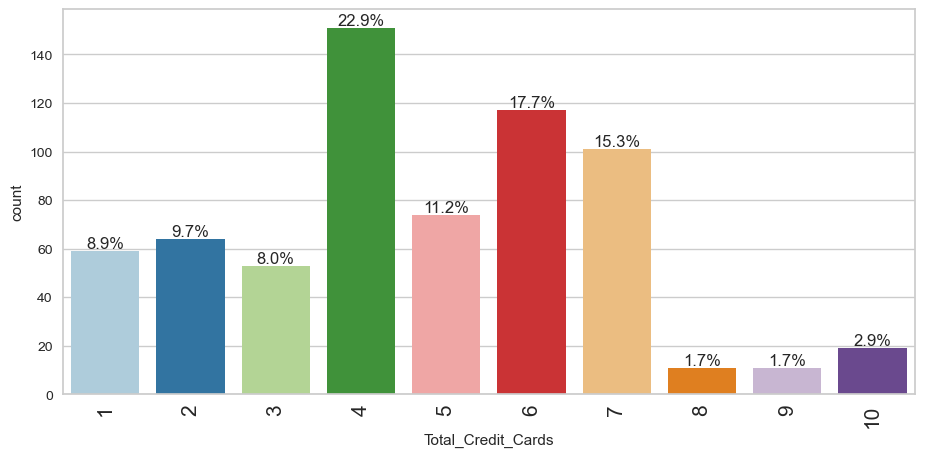

In [35]:
labeled_barplot(data, 'Total_Credit_Cards', perc=True)

**Observations**

- The highest percentage of customers (22.9%) own 4 credit cards.
- The second-highest percentage of customers (17.7%) have 6 credit cards.
- There is a significant drop in the number of customers with 8, 9, or 10 credit cards, each constituting a small portion of the dataset.
- 1, 2, and 3 credit cards are less common than 4, 5, 6, or 7 cards, with percentages ranging between 8.0% to 9.7%.
- A pattern seems to suggest that most customers tend to have between 4 to 7 credit cards, making up the bulk of the distribution.
- This distribution indicates that the majority of customers have moderate credit card holdings, with fewer customers having very few or very many cards.

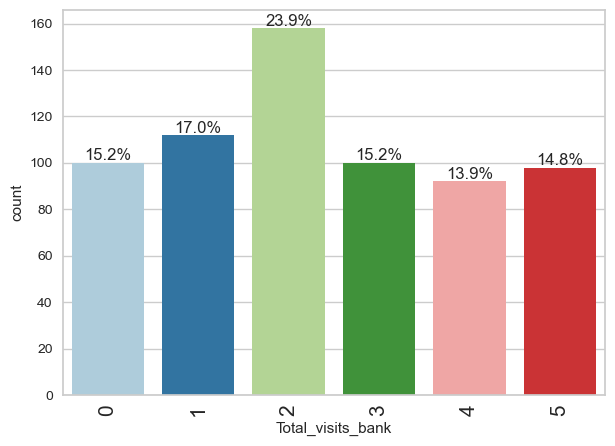

In [36]:
labeled_barplot(data, 'Total_visits_bank', perc=True)

#### Observation
1.	The highest percentage of customers (23.9%) visit the bank 2 times.
2.	17.0% of customers visit the bank once, which is the second most frequent number of visits.
3.	15.2% of customers either visit 0 times or 3 times.
4.	14.8% of customers visit the bank 5 times, and 13.9% visit 4 times.
5.	Overall, most customers visit the bank 2 or 1 times, with a fairly even distribution across 0, 3, 4, and 5 visits.


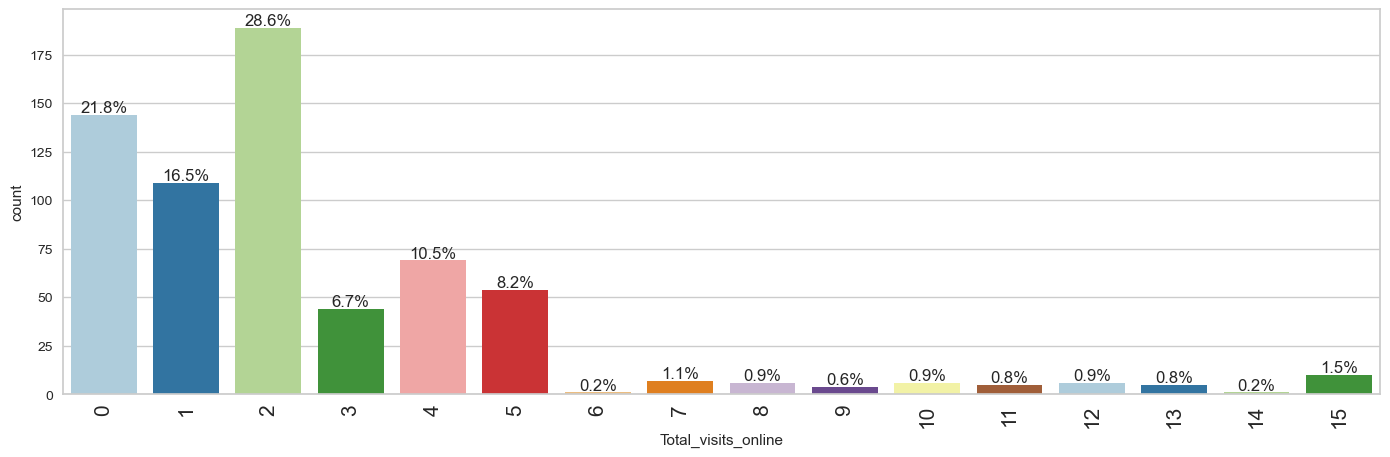

In [37]:
labeled_barplot(data, 'Total_visits_online', perc=True)

#### Observation
1.	The majority of customers (28.6%) visit the bank online 2 times.
2.	21.8% of customers make 0 online visits, suggesting they don't use online services.
3.	16.5% of customers visit online once, while 10.5% visit 4 times.
4.	The percentage of customers who visit online 3 or 5 times is 6.7% and 8.2%, respectively.
5.	Online visits above 5 are rare, with minimal customer percentages for visits ranging from 6 to 15. The percentage is especially low for visits between 6 and 13, with values around 1% or lower.


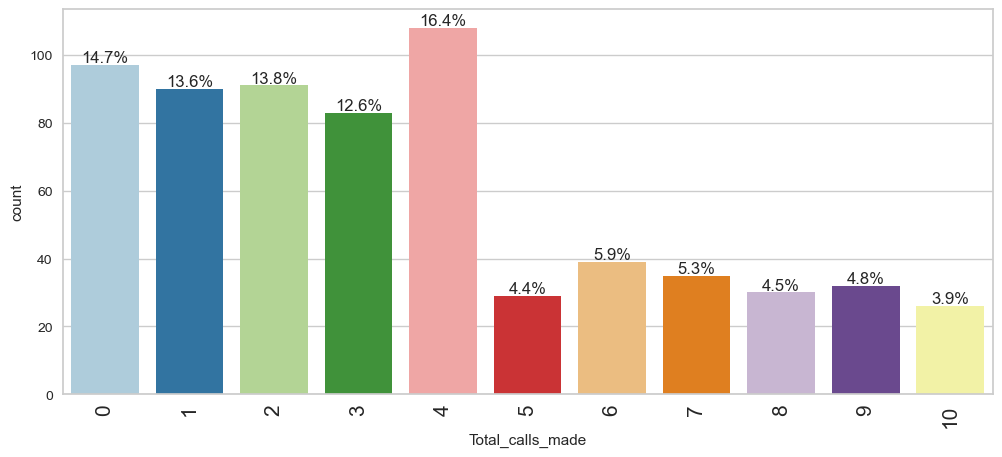

In [38]:
labeled_barplot(data, 'Total_calls_made', perc=True)

### Observation
- High Concentration at 4 Calls: The majority of customers make around 4 calls, with 16.4% of users in this category. This might indicate that a typical customer interaction or resolution might require multiple calls, with 4 being the most frequent.

- Gradual Decline After 4: After the 4-call mark, the number of calls significantly drops, which could imply that after a certain number of calls, the issue is generally resolved, or customer service fatigue sets in, reducing further interaction.

- Not Many Customers Call More Than 6 Times: Beyond 6 calls, the proportion of customers decreases notably (less than 6% for each category). This suggests that issues are mostly resolved in fewer than 5 or 6 calls, and prolonged interactions are less common.

- 0 Calls (14.7%): A significant portion of customers (14.7%) haven’t made any calls, which could indicate either no issues or a preference for self-service options like mobile apps, websites, or chatbots.

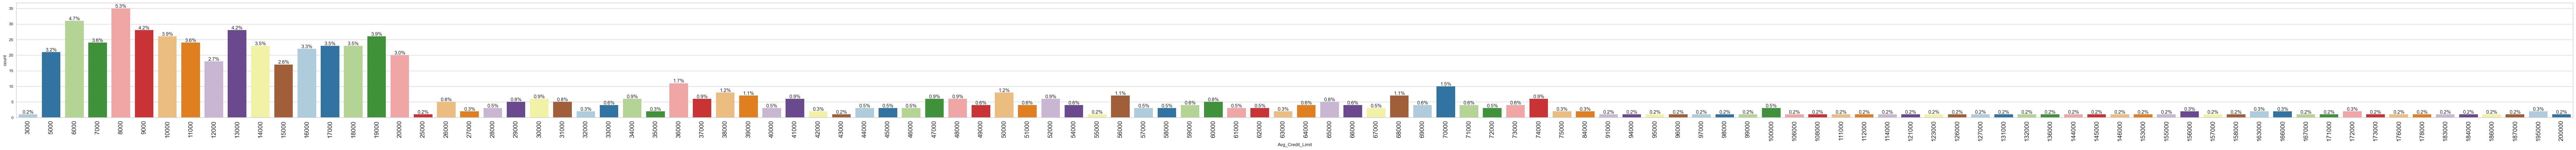

In [39]:
labeled_barplot(data,'Avg_Credit_Limit', perc=True)

### Bivariate Analysis

In [40]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Total_visits_bank     0    1    2    3   4   5  All
Total_Credit_Cards                                 
All                 100  112  158  100  92  98  660
4                    13   22   35   26  27  28  151
6                     1    0   24   34  24  34  117
7                     4    4   24   25  23  21  101
5                     1    1   24   15  18  15   74
1                    21   21   17    0   0   0   59
2                    25   19   20    0   0   0   64
3                    21   18   14    0   0   0   53
8                     4    7    0    0   0   0   11
9                     3    8    0    0   0   0   11
10                    7   12    0    0   0   0   19
------------------------------------------------------------------------------------------------------------------------


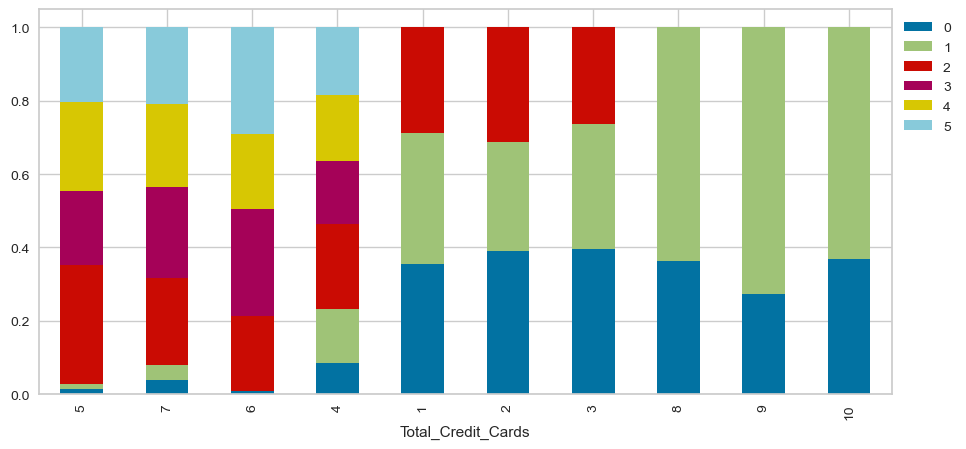

In [41]:
stacked_barplot(data,"Total_Credit_Cards","Total_visits_bank")

### Observation
- The image provides a stacked bar chart that depicts the relationship between the Total Credit Cards a person has and the Total Visits to the Bank. Here are the key observations:

- Variation Across Credit Card Holders:

- Individuals with 5 or more credit cards (represented on the left side of the chart) tend to have a more varied number of bank visits. This group has a more spread-out distribution, with a larger share of people making anywhere from 1 to 5 visits.
- Lower Bank Visits for Fewer Credit Cards:

- Individuals with 1 or 2 credit cards have fewer visits overall, as indicated by the dominance of the blue (0 visits) and green (1 visit) sections. This suggests that people with fewer credit cards are less likely to visit the bank frequently.
- High Number of Visits for Certain Groups:

- For people with 5 or more credit cards, there are noticeable bars representing 4 and 5 visits to the bank, which indicates more frequent banking activity. This group tends to visit the bank more often, possibly due to managing more complex financial needs.
- The group with 1 credit card has a substantial portion of individuals making 2 or more visits (represented by red and purple bars), which might indicate that certain customers with fewer credit cards still visit the bank frequently, likely due to other banking needs.
- Overall Trend:

- As the number of credit cards increases, there is a trend towards a higher diversity in the number of bank visits, with a broader range of visit counts (0 through 5).
- The zero visits (blue) segment is quite prominent across most categories, suggesting that many individuals across all credit card ownership levels rarely visit the bank.
### Summary:
- Individuals with more credit cards generally make more frequent visits to the bank, with a more diverse distribution of visit counts.
- People with fewer credit cards (especially 1 or 2) tend to make fewer bank visits, and the majority have either 0 or 1 visits.

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_Credit_Cards                                                           
8                      0    0    0   0   0   0  1  4  2  1   0   0   0   1   
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
1                      0    0   18   9  17  15  0  0  0  0   0   0   0   0   
2                      0    1   14  15  18  16  0  0  0  0   0   0   0   0   
3                      0    2   12   8  14  16  0  0  0  0   1   0   0   0   
4                     44   25   44  11  20   7  0  0  0  0   0   0   0   0   
5                     22   23   28   0   0   0  0  0  0  0   0   1   0   0   
6                     35   38   43   0   0   0  0  0  0  0   0   0   1   0   
7                     43   20   30   1   0   0  0  1  1  0   1   1   0   2   
9                      0    0    0   0   0   0  0  0  1  1   2   2   3   0   
10                     0    0    0   0   0   0  0  2  2  2   2  

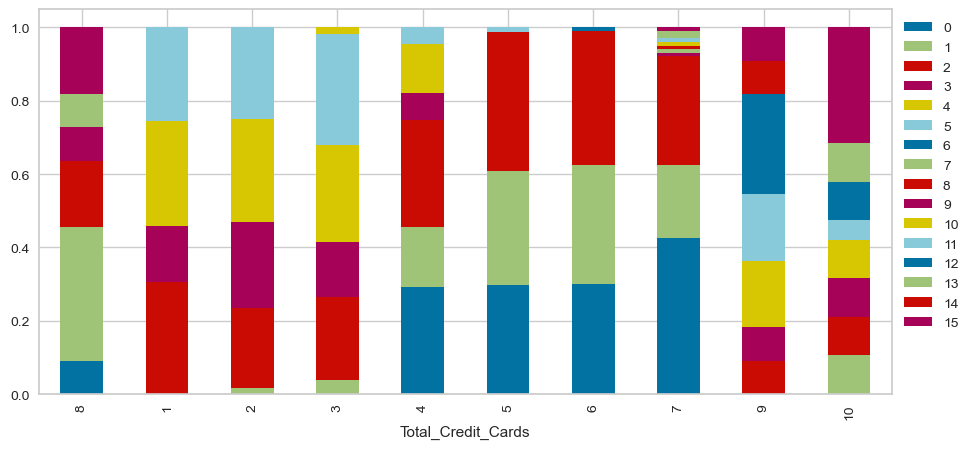

In [42]:
stacked_barplot(data,"Total_Credit_Cards","Total_visits_online")

Total_calls_made     0   1   2   3    4   5   6   7   8   9  10  All
Total_Credit_Cards                                                  
All                 97  90  91  83  108  29  39  35  30  32  26  660
1                    0   0   0   0    6   8   7  12   7  10   9   59
2                    1   0   1   0   12   7  11   8  12   6   6   64
4                   23  22  21  19   23   6   8   9   7   7   6  151
3                    0   1   0   0    7   8  13   6   4   9   5   53
5                   13  14  15  14   18   0   0   0   0   0   0   74
6                   27  22  20  30   18   0   0   0   0   0   0  117
7                   20  18  19  20   24   0   0   0   0   0   0  101
8                    4   5   2   0    0   0   0   0   0   0   0   11
9                    3   2   6   0    0   0   0   0   0   0   0   11
10                   6   6   7   0    0   0   0   0   0   0   0   19
-------------------------------------------------------------------------------------------------------

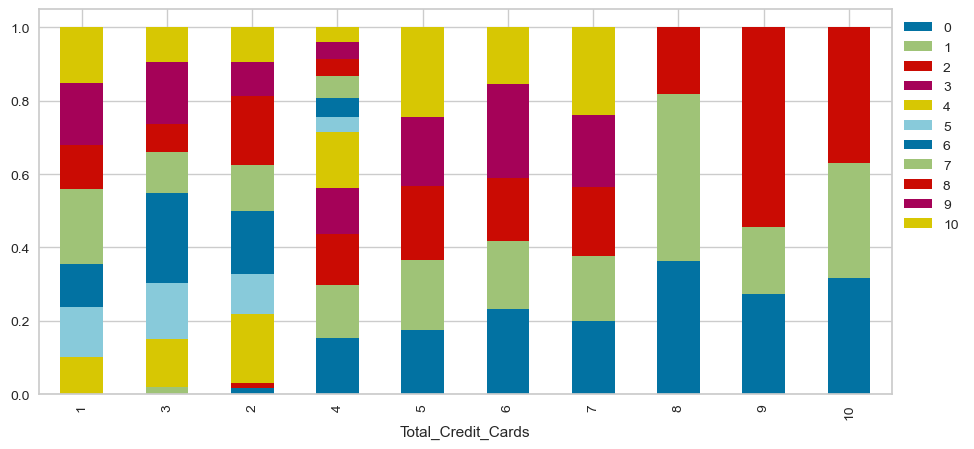

In [43]:
stacked_barplot(data,"Total_Credit_Cards","Total_calls_made")

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_visits_bank                                                            
1                      0    2   15  11  30  24  1  5  3  3   4   3   3   1   
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
0                      0    3   20  17  23  16  0  2  3  1   2   2   3   4   
2                     40   27   45  16  16  14  0  0  0  0   0   0   0   0   
3                     32   33   35   0   0   0  0  0  0  0   0   0   0   0   
4                     31   23   38   0   0   0  0  0  0  0   0   0   0   0   
5                     41   21   36   0   0   0  0  0  0  0   0   0   0   0   

Total_visits_online  14  15  All  
Total_visits_bank                 
1                     1   6  112  
All                   1  10  660  
0                     0   4  100  
2                     0   0  158  
3                     0   0  100  
4                     0   0   92  
5                

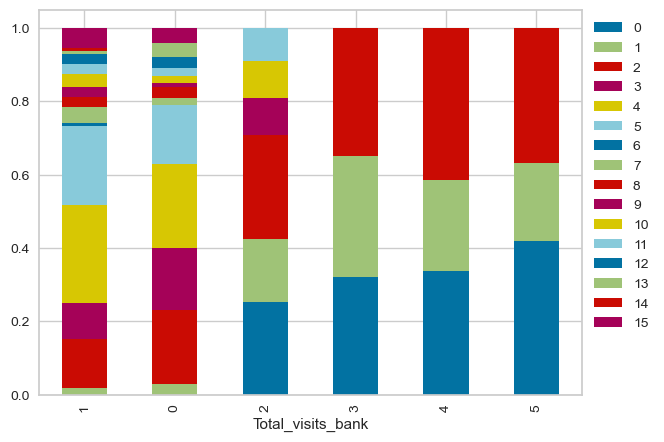

In [44]:
stacked_barplot(data,"Total_visits_bank","Total_visits_online")

Total_calls_made    0   1   2   3    4   5   6   7   8   9  10  All
Total_visits_bank                                                  
All                97  90  91  83  108  29  39  35  30  32  26  660
0                   7   6   8   1   10  10  10  13  11  12  12  100
1                  10  10  11   0   15  10  14  12   9  12   9  112
2                  19  14  21  18   29   9  15  10  10   8   5  158
3                  21  19  18  21   21   0   0   0   0   0   0  100
4                  21  19  18  23   11   0   0   0   0   0   0   92
5                  19  22  15  20   22   0   0   0   0   0   0   98
------------------------------------------------------------------------------------------------------------------------


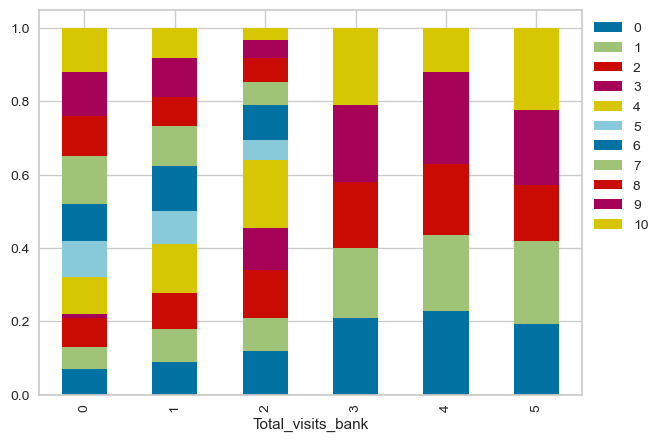

In [45]:
stacked_barplot(data,"Total_visits_bank","Total_calls_made")

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_calls_made                                                             
1                     26   16   33   0   0   0  1  2  3  2   2   0   1   0   
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
0                     30   30   21   0   0   0  0  3  2  0   1   3   0   3   
2                     27   19   27   0   0   0  0  2  1  2   2   2   4   2   
3                     26   18   38   0   0   0  0  0  0  0   0   0   1   0   
4                     35   24   26   7  10   6  0  0  0  0   0   0   0   0   
5                      0    0    9   5   6   9  0  0  0  0   0   0   0   0   
6                      0    0    9   7  15   8  0  0  0  0   0   0   0   0   
7                      0    1    9   9  10   6  0  0  0  0   0   0   0   0   
8                      0    1    5   5  10   9  0  0  0  0   0   0   0   0   
9                      0    0    4   3  13  11  0  0  0  0   1  

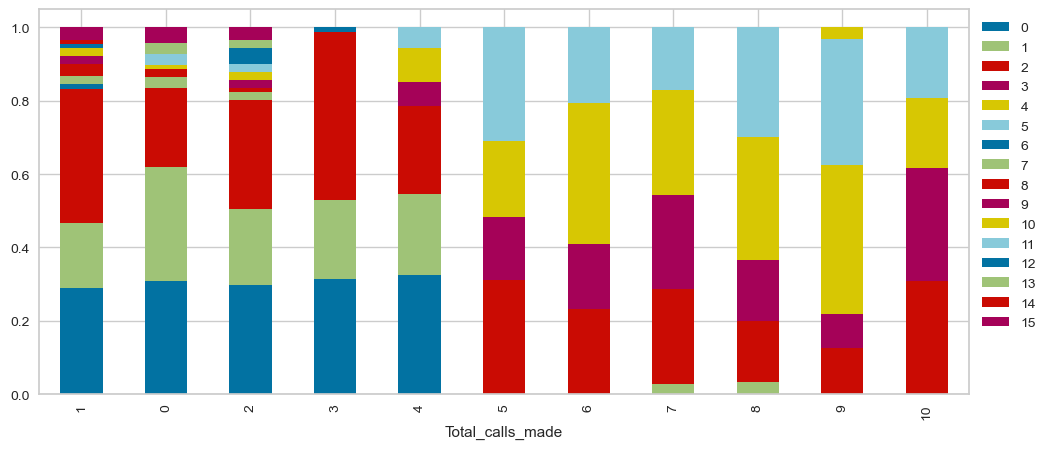

In [46]:
stacked_barplot(data,"Total_calls_made","Total_visits_online")

### Multivariate Analysis

**Let's check for correlations.**

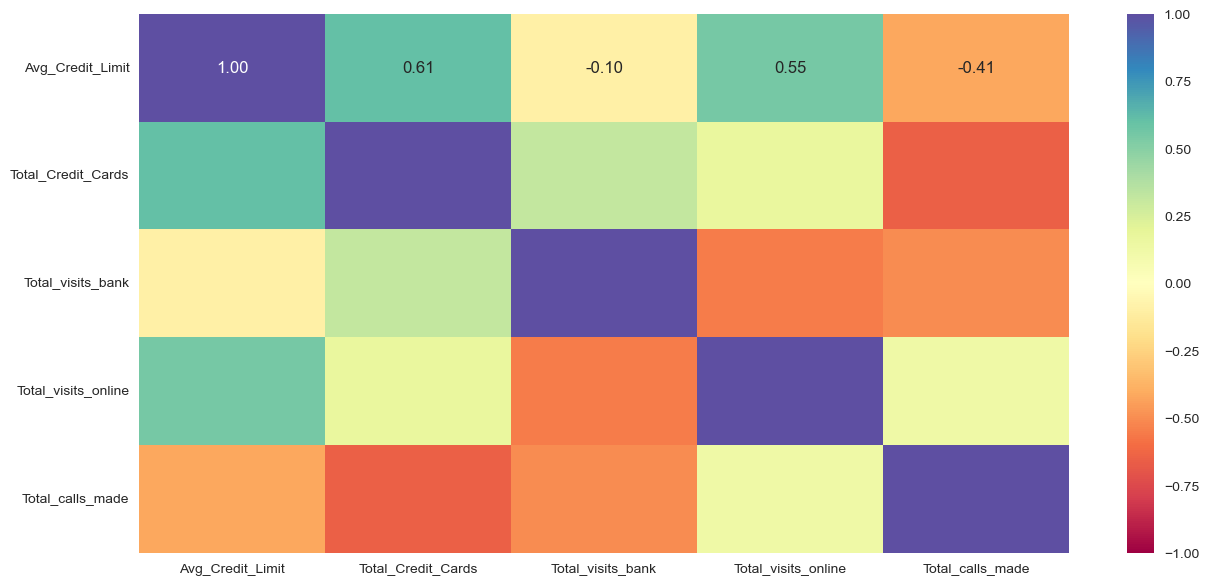

In [47]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**
- Total credit cards and total visit online has medium positive correlation with average credit limit : 0.61,0.55 respectively.
- Total credit cards and total visit bank has medium negative correlation with total calls made : -0.65,-0.5 respectively.
- Total visit online has medium negative correlation with total visit bank : -0.55.

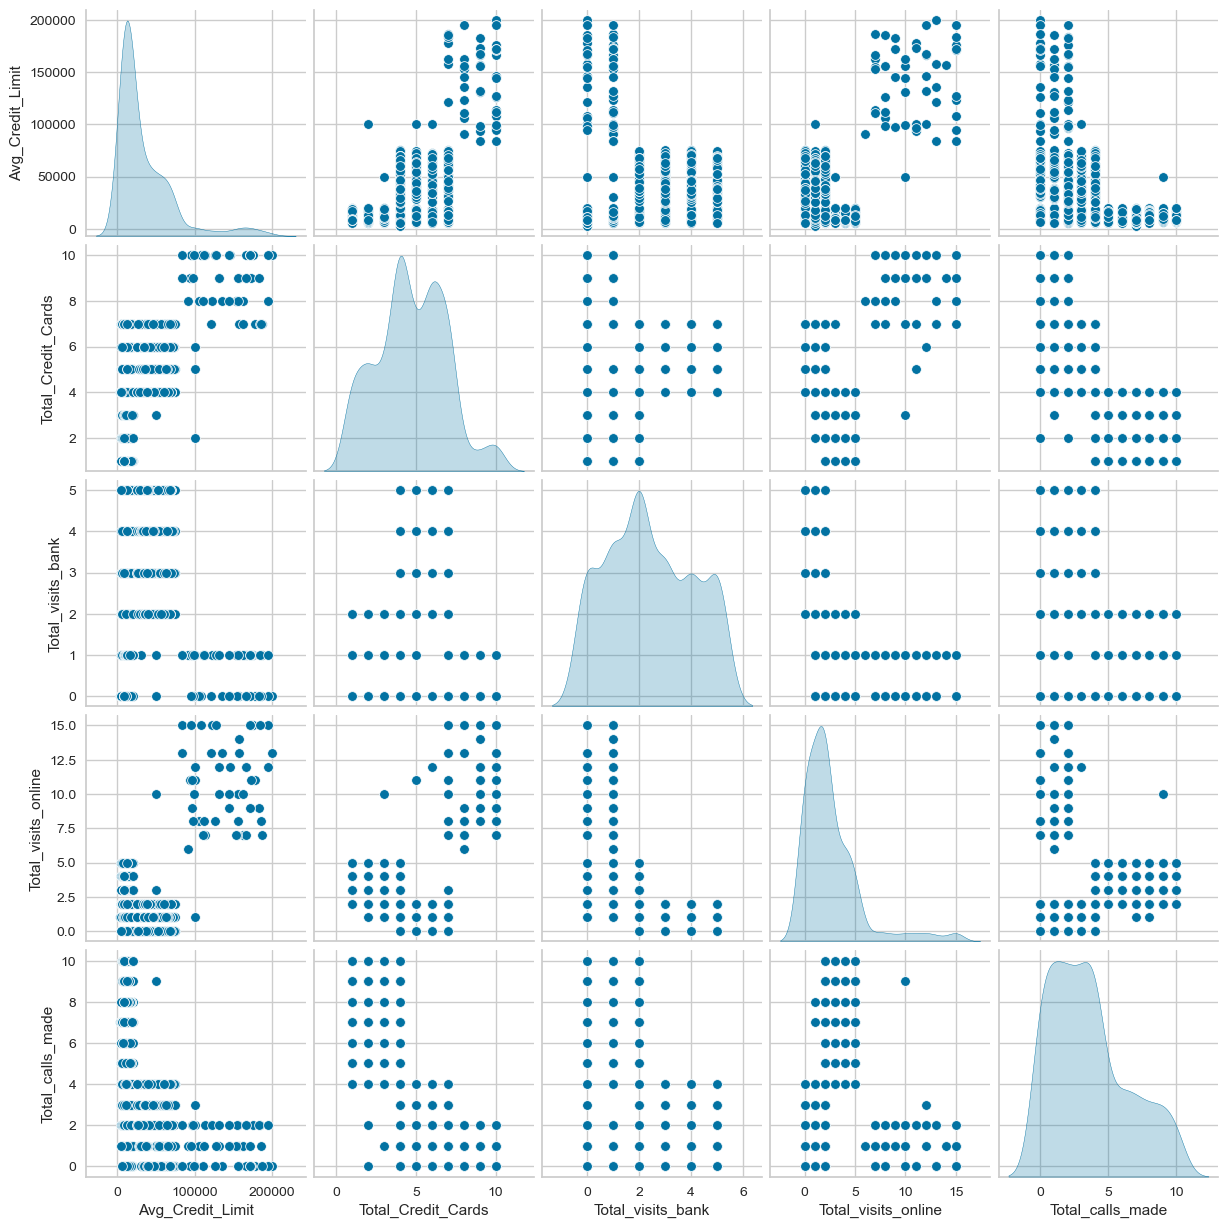

In [48]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

### Data Preprocessing
• Prepare the data for analysis 
• Feature Engineering 
• Missing value Treatment 
• Outlier Treatment 
• Duplicate observations check and removal if found

### Missing value

- There is no missing values in the dataset.

### Duplicate value

In [49]:
# Verify if there are no duplicates
df.duplicated().sum()  

0

-   Dataset Check: Upon checking the entire dataset, no duplicate rows were found.
-	Customer key Check:
-	However, upon further inspection, we found that there are duplicate values specifically in the Customer key column. 
-	This indicates that while the overall data rows are unique. The 'Customer Key' is a unique ID given to each customer in the database. 
-	The duplicate values might correspond to customer profile changes, and as such, there is no need to delete these records as these are actual occurrences at some point in the time. 
-	The Customer key column can be removed during the analysis.
-	We won't need Serial. No.  for analysis, so let's drop these columns.



### OUTLIER DETECTION

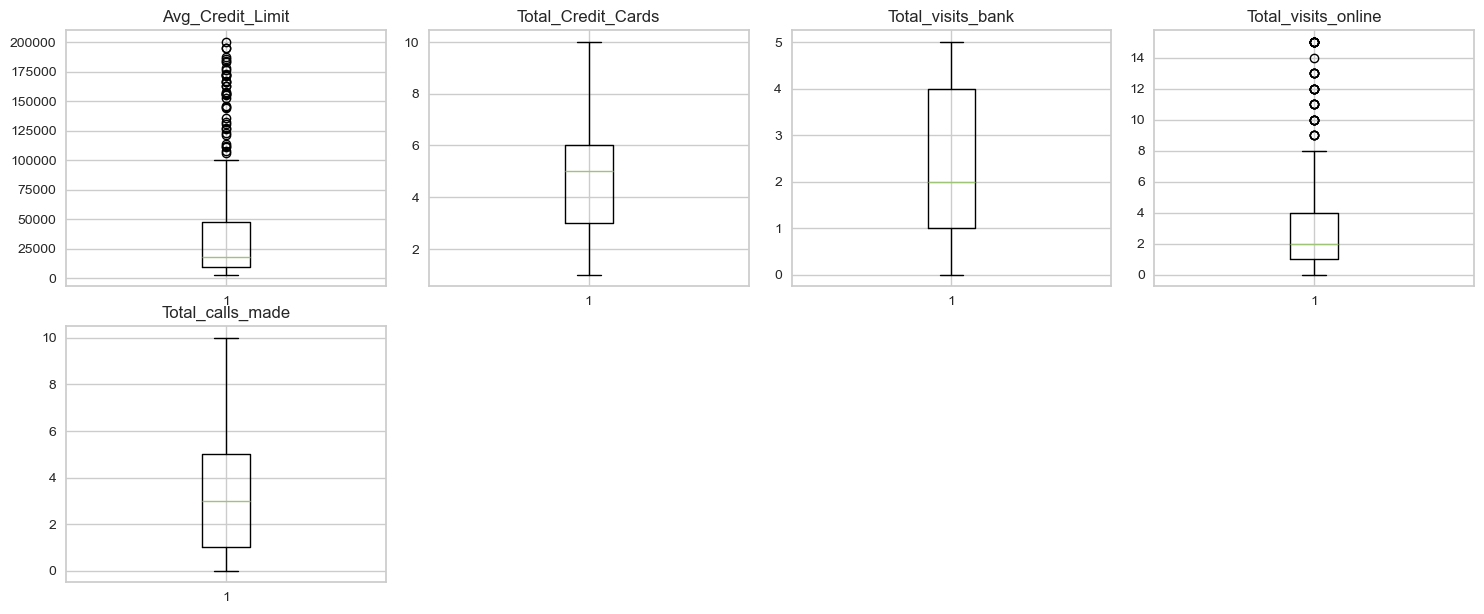

In [50]:
#Outlier detection using boxplot
#Formula for outlier detection
plt.figure(figsize=(15,12))

for i, variable in enumerate(num_col):
    plt.subplot(4,4,i+1)
    plt.boxplot(data[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are some outliers in Total visit online and Average credit limit.But these values are genuine,so will need not to treat the outliers.

### Data Scaling

In [51]:
# variables used for clustering
num_col = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

In [52]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [53]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


## MODEL BUILDING

### K - Means Clustering

Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429889401411244
Number of Clusters: 7 	Average Distortion: 0.9094770282853165
Number of Clusters: 8 	Average Distortion: 0.8893571274402587
Number of Clusters: 9 	Average Distortion: 0.8632541436003959
Number of Clusters: 10 	Average Distortion: 0.8476438243597384


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

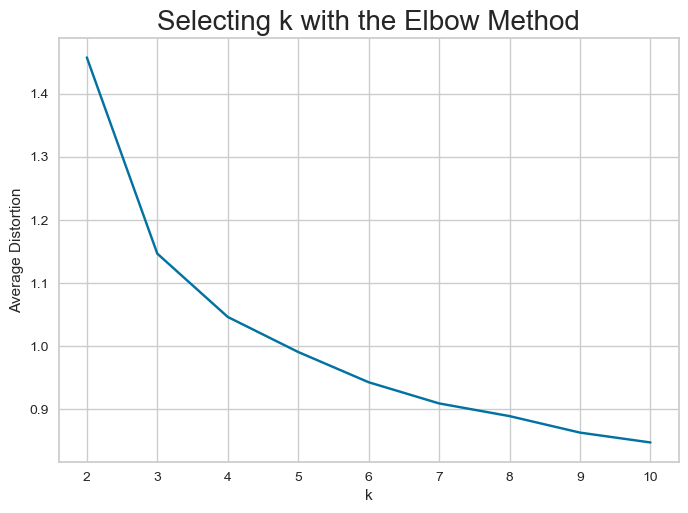

In [54]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

### Appropriate k seems to be a 3 .

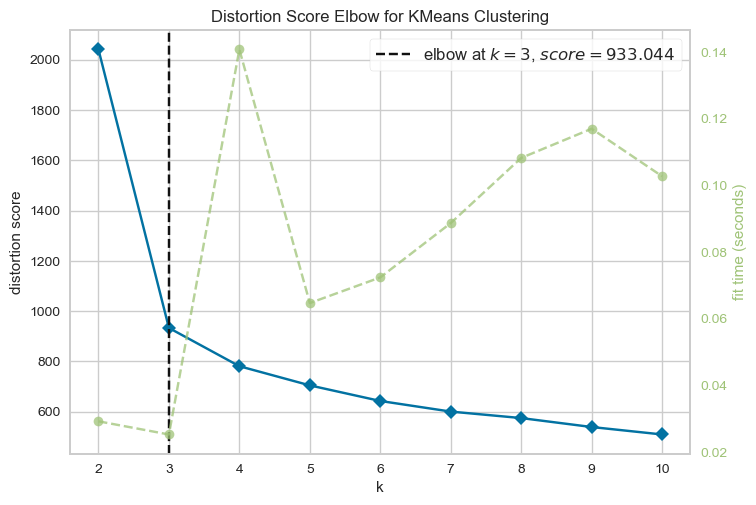

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

#### The appropriate value of k from the elbow curve seems to be 3

#### Let's check the silhouette scores

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.25583657571102003
For n_clusters = 7, silhouette score is 0.23372369607323304
For n_clusters = 8, silhouette score is 0.22590710225458094
For n_clusters = 9, silhouette score is 0.2178375987442125
For n_clusters = 10, silhouette score is 0.2189953428996585


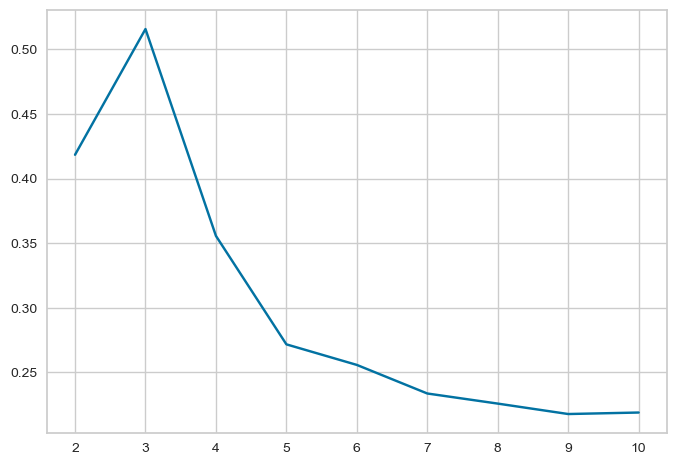

In [56]:
sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

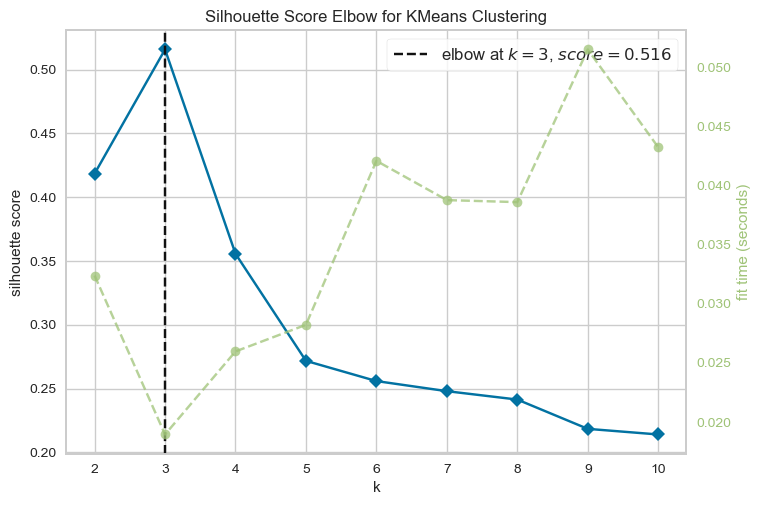

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [57]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

#### From the silhouette scores, it seems that 3 is a good value of k.

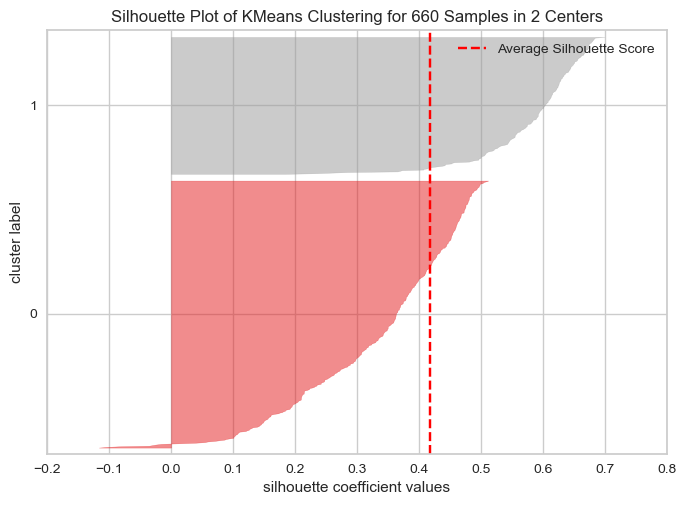

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

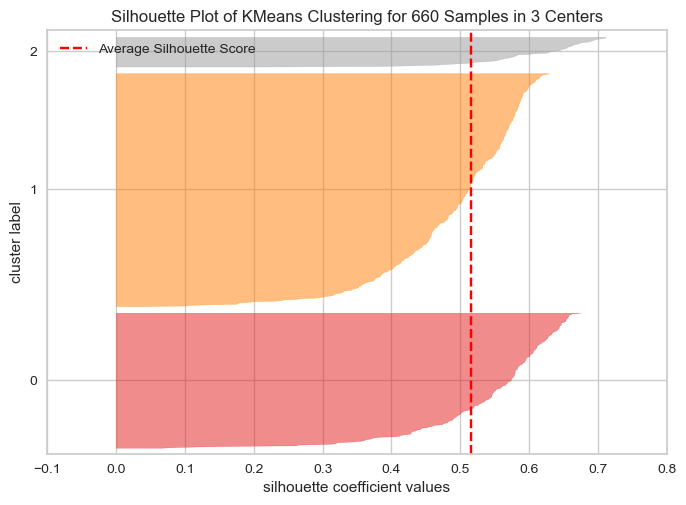

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

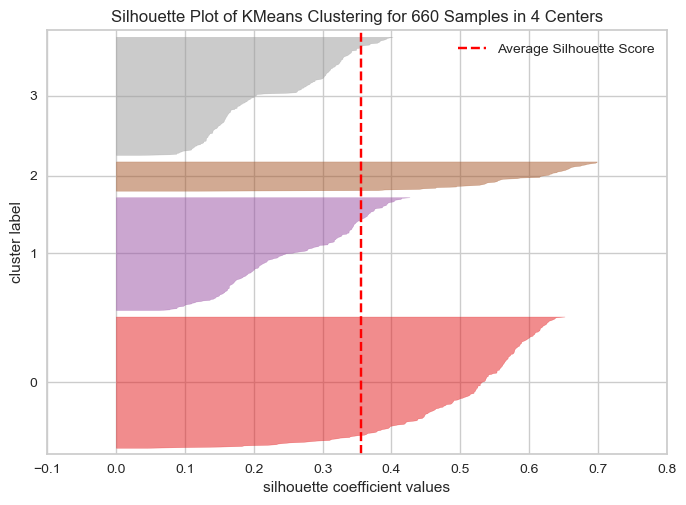

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

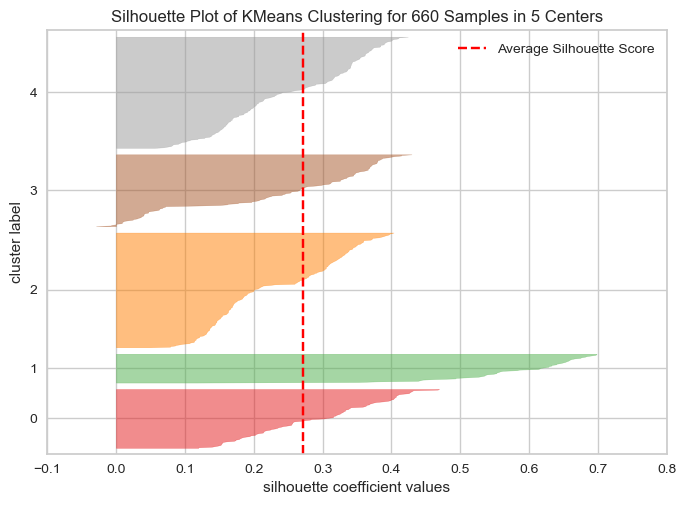

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [61]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

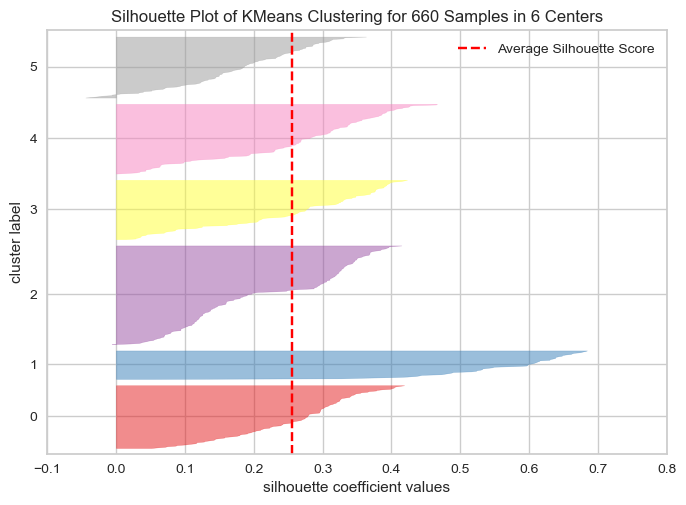

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [62]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

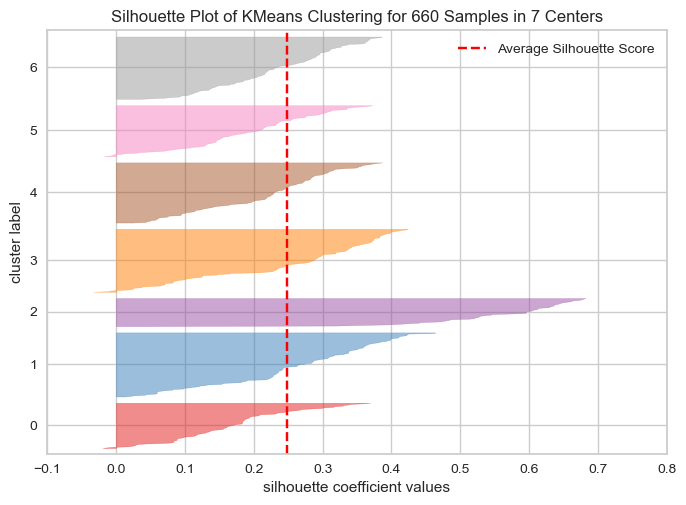

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Selecting final model

#### Let's take 3 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 3 in the elbow curve.

In [64]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [65]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [66]:
cluster_profile = df.drop('Customer_Key', axis=1).groupby("K_means_segments").mean(numeric_only=True)

In [67]:
clusters = df.K_means_segments.unique().tolist()
for cl in clusters:
    print(
        "The",
        df[df["K_means_segments"] == cl]["Total_Credit_Cards"].nunique(),
        "Total credit cards",
        cl,
        "are:",
    )
    print(df[df["K_means_segments"] == cl]["Total_Credit_Cards"].unique())
    

The 5 Total credit cards 0 are:
[2 7 5 4 6]
The 4 Total credit cards 1 are:
[3 2 4 1]
The 6 Total credit cards 2 are:
[ 6  5  9  8 10  7]


In [68]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [69]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


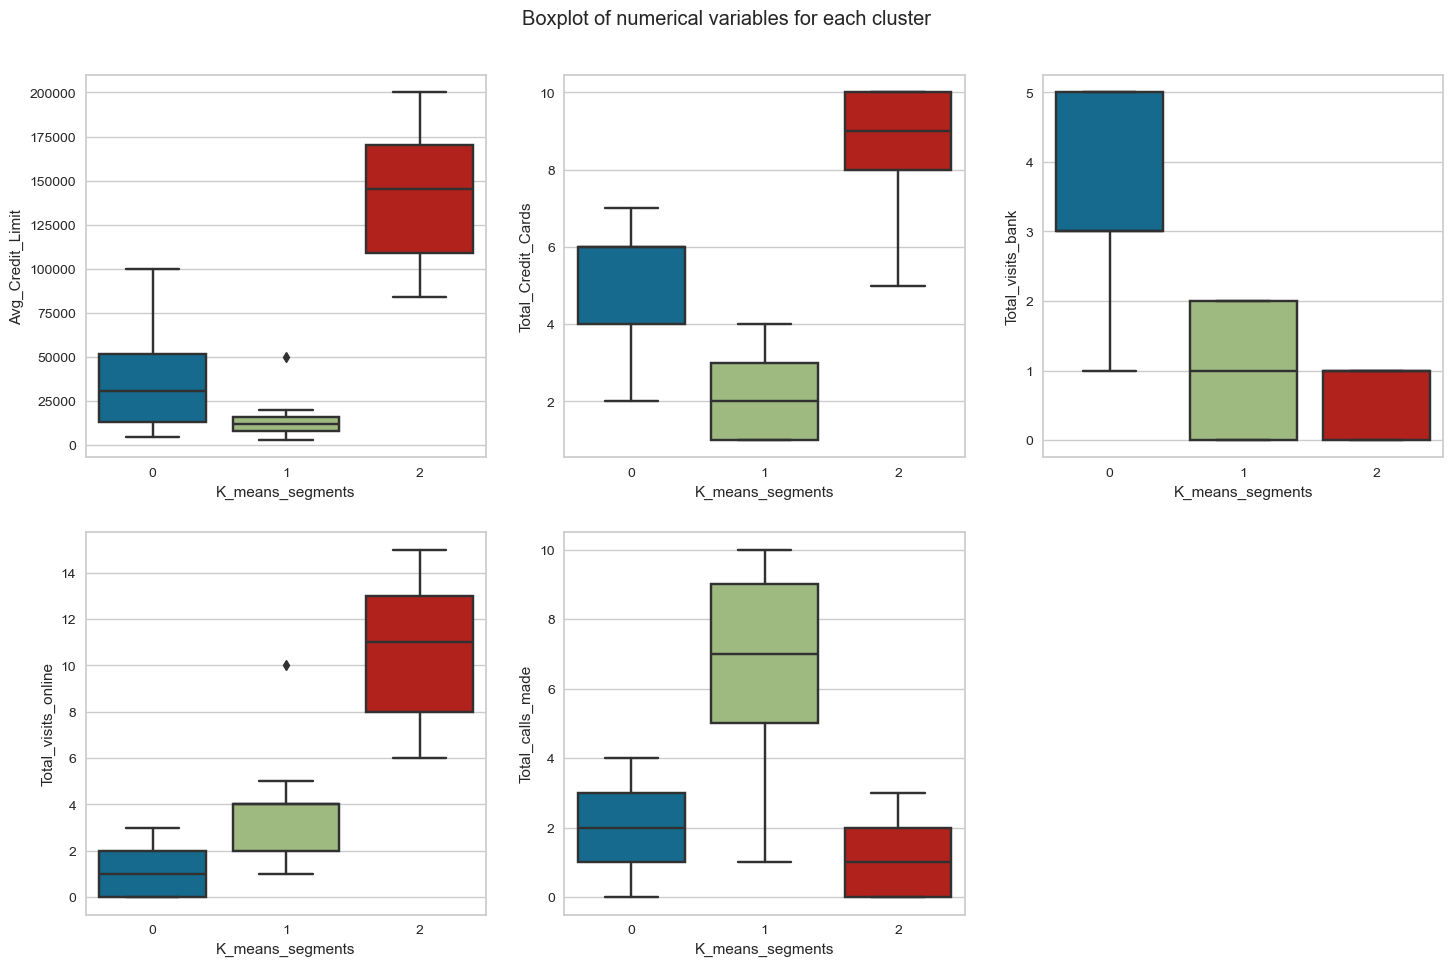

In [70]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

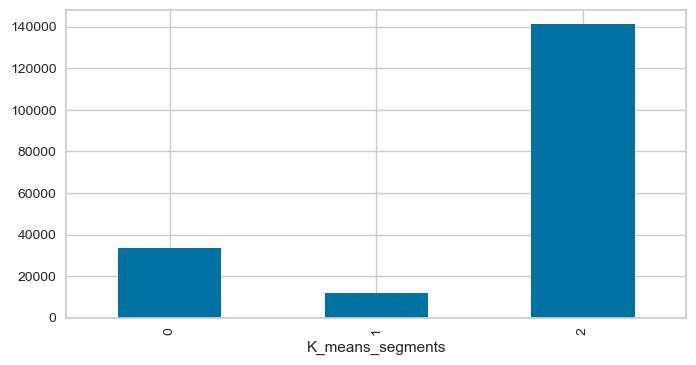

In [71]:
# Checking the groups for Avg_Credit_Limit
cluster_profile['Avg_Credit_Limit'].groupby('K_means_segments').mean().plot.bar(figsize=(8,4));

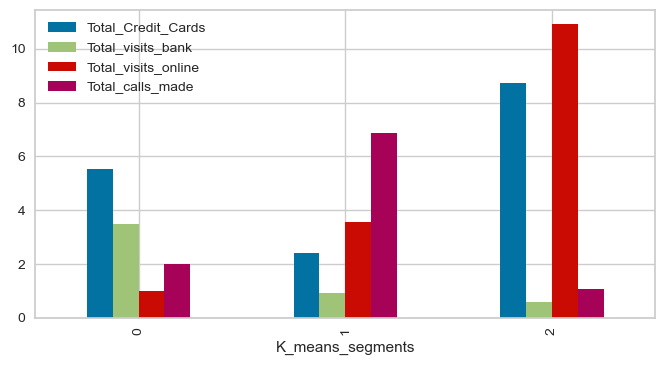

In [72]:
# Checking the groups for the remaining features
cluster_profile[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']].groupby('K_means_segments').mean().plot.bar(figsize=(8,4));

### Insight for K -Means

### Cluster 0
-   Average Credit Limit: $33,782.38 (highest among lower segments)
-	Total Credit Cards: 5.52 (moderate)
-	Total Visits to Bank: 3.49 (indicates some preference for traditional banking)
-	Total Visits Online: 0.98 (low online engagement)
-	Total Calls Made: 2.00 (average level of customer support interaction)
-	Count in Segment: 386 (largest segment)

### Cluster 1
-	Average Credit Limit: $12,174.11 (lowest)
-	Total Credit Cards: 2.41 (lowest)
-	Total Visits to Bank: 0.93 (very low traditional banking usage)
-	Total Visits Online: 3.55 (highest online engagement)
-	Total Calls Made: 6.87 (high call volume indicating need for assistance)
-	Count in Segment: 224
-	Overall Assessment: Engaged but financially weaker; high reliance on customer support suggests potential areas for improvement in service delivery.

### Cluster 2
-	Average Credit Limit: $141,040.00 (highest)
-	Total Credit Cards: 8.74 (highest)
-	Total Visits to Bank: 0.60 (minimal in-person banking)
-	Total Visits Online: 10.90 (very high online engagement)
-	Total Calls Made: 1.08 (very low, indicating confidence in managing finances)
-	Count in Segment: 50 (smallest segment)
-	Overall Assessment: High-value customers with significant financial power; small size but high revenue potential; tech-savvy and predominantly prefer digital banking.


## Hierarchical Clustering

### Apply Hierarchical clustering with different linkage methods and plot dendrograms for each linkage methods

### Computing Cophenetic Correlation

In [73]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801747.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

In [74]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [75]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [76]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


**Observations**

- We see that the cophenetic correlation is maximum with  Euclidean distance and average linkage.




### Checking Dendrograms

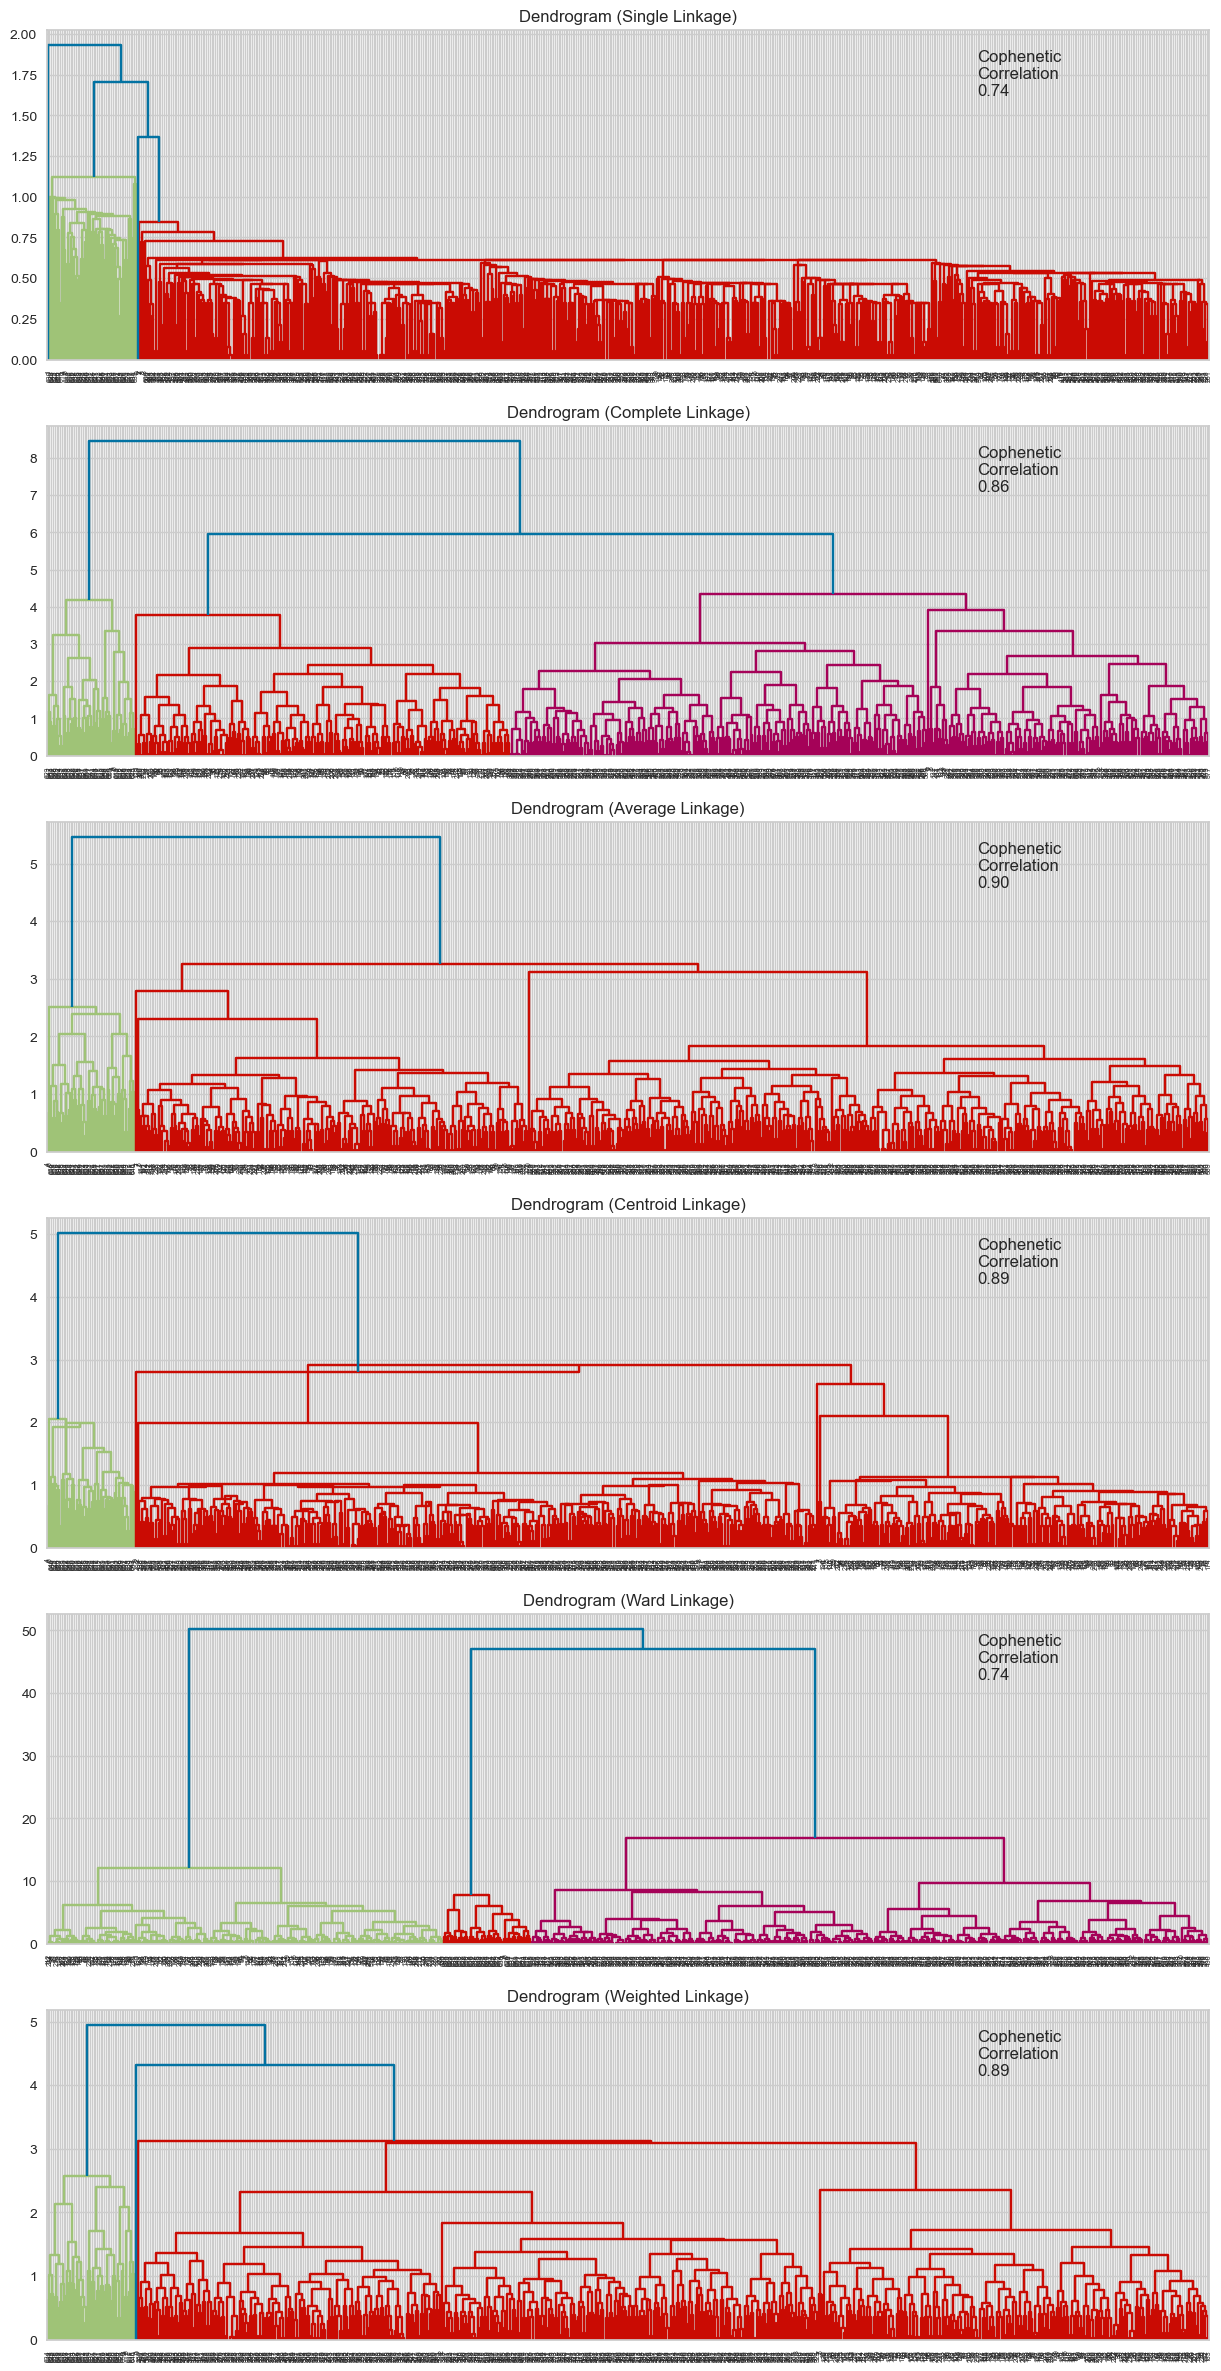

In [77]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

### Observations

- Dendrogram for Ward linkage shows distinct and separate clusters though it has less cohenetic correlation than other linkage.

In [78]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,centroid,0.893939
4,ward,0.741516
5,weighted,0.886175


### Observations

- Out of all the dendrograms we saw, it is clear that the dendrogram with ward linkage gave us separate and distinct clusters.
- 3 would be the appropriate number of the clusters from the dendrogram with ward linkage method.

### Creating Final Model

**Let's create 3 clusters.**

In [79]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [80]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [81]:
cluster_profile = df.drop('Customer_Key', axis=1).groupby("HC_Clusters").mean(numeric_only = True)

In [82]:
clusters = df.HC_Clusters.unique().tolist()
for cl in clusters:
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Total_Credit_Cards"].nunique(),
        "Total credit cards",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Total_Credit_Cards"].unique())
    

The 5 Total credit cards 0 are:
[2 7 5 4 6]
The 5 Total credit cards 1 are:
[3 2 4 1 5]
The 6 Total credit cards 2 are:
[ 6  5  9  8 10  7]


In [83]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [84]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,0.000000,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,0.995556,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50


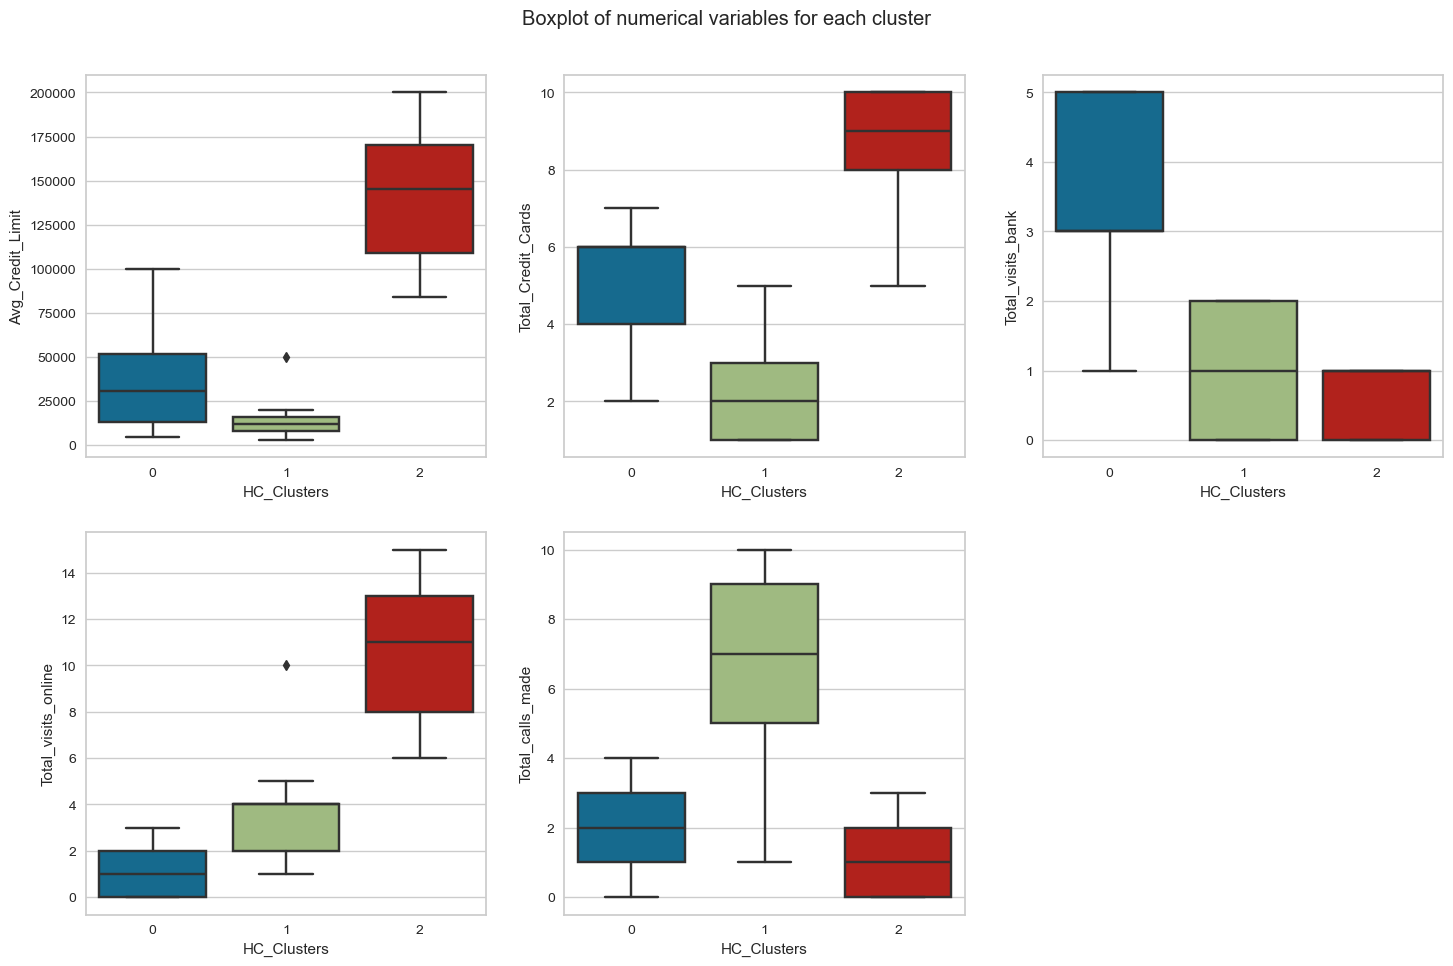

In [85]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

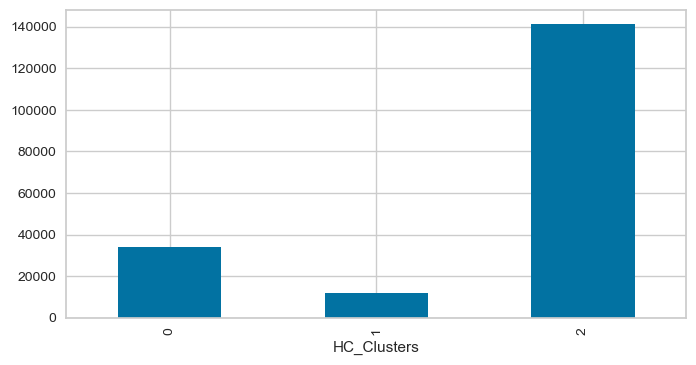

In [86]:
# Checking the groups for Avg_Credit_Limit
cluster_profile['Avg_Credit_Limit'].groupby('HC_Clusters').mean().plot.bar(figsize=(8,4));

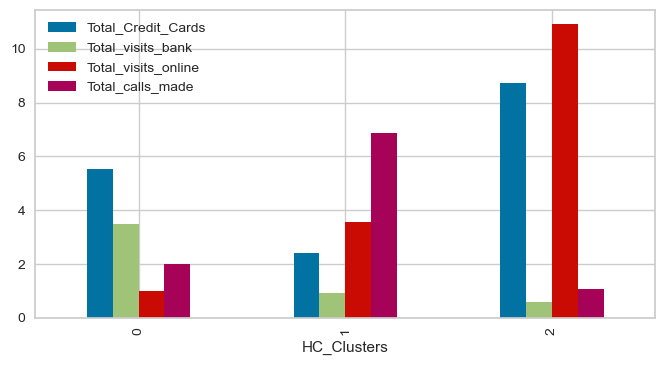

In [87]:
# Checking the groups for the remainder features
cluster_profile[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']].groupby('HC_Clusters').mean().plot.bar(figsize=(8,4));

### Insights


### HC Cluster Observations

#### HC Cluster 0

- Average Credit Limit: $33,851.95
- Total Credit Cards: 5.52 (moderate)
- Total Visits to Bank: 3.49 (indicates some preference for in-person banking)
- Total Visits Online: 0.98 (low online engagement)
- Total Calls Made: 1.99 (average level of customer support interaction)
- Count in Segment: 385 (largest cluster)
#### Observation: This segment consists of a large customer base with moderate financial capability and balanced banking habits, favoring in-person visits over online interactions. It’s a reliable source of revenue due to its size and consistent engagement.
#### HC Cluster 1

- Average Credit Limit: $12,151.11 (lowest)
- Total Credit Cards: 2.42 (fewest cards)
- Total Visits to Bank: 0.94 (low traditional banking usage)
- Total Visits Online: 3.55 (high online engagement)
- Total Calls Made: 6.86 (high, indicating frequent need for assistance)
- Count in Segment: 225

#### Observation: This segment has the lowest financial capability but shows high customer support engagement through calls and online visits. They may require additional resources or support, suggesting an opportunity to enhance service and increase their financial empowerment over time.
#### HC Cluster 2
- Average Credit Limit: $141,040.00 (highest)
- Total Credit Cards: 8.74 (highest number of cards)
- Total Visits to Bank: 0.60 (minimal in-person banking)
- Total Visits Online: 10.90 (very high online engagement)
- Total Calls Made: 1.08 (very low, indicating confidence in digital banking)
- Count in Segment: 50 (smallest cluster)

#### Observation: This cluster includes high-value, financially empowered customers who rely heavily on online banking. They require minimal support and are likely independent in managing their finances digitally. Despite their small size, they have significant revenue potential and would benefit from targeted loyalty and retention programs.
### Summary of HC Clusters
- HC Cluster 0: A large segment with a balanced approach to banking, providing steady revenue.
- HC Cluster 1: Engaged but financially less capable, with high support needs. Potential for growth through increased support and tailored financial products.
- HC Cluster 2: The most financially valuable and independent segment; strong potential for profitability through digital services and loyalty incentives.







### Compare K-Means Cluster and Hierarchical clusters

In [88]:
k_means_summary = df.groupby("K_means_segments")[num_col].mean()
hc_summary = df.groupby("HC_Clusters")[num_col].mean()

print("K-means Cluster Means:\n", k_means_summary)
print("\nHierarchical Cluster Means:\n", hc_summary)


K-means Cluster Means:
                   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
K_means_segments                                                            
0                     33782.383420            5.515544           3.489637   
1                     12174.107143            2.410714           0.933036   
2                    141040.000000            8.740000           0.600000   

                  Total_visits_online  Total_calls_made  
K_means_segments                                         
0                            0.981865          2.000000  
1                            3.553571          6.870536  
2                           10.900000          1.080000  

Hierarchical Cluster Means:
              Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
HC_Clusters                                                            
0                33851.948052            5.516883           3.493506   
1                12151.111111            2.422222     

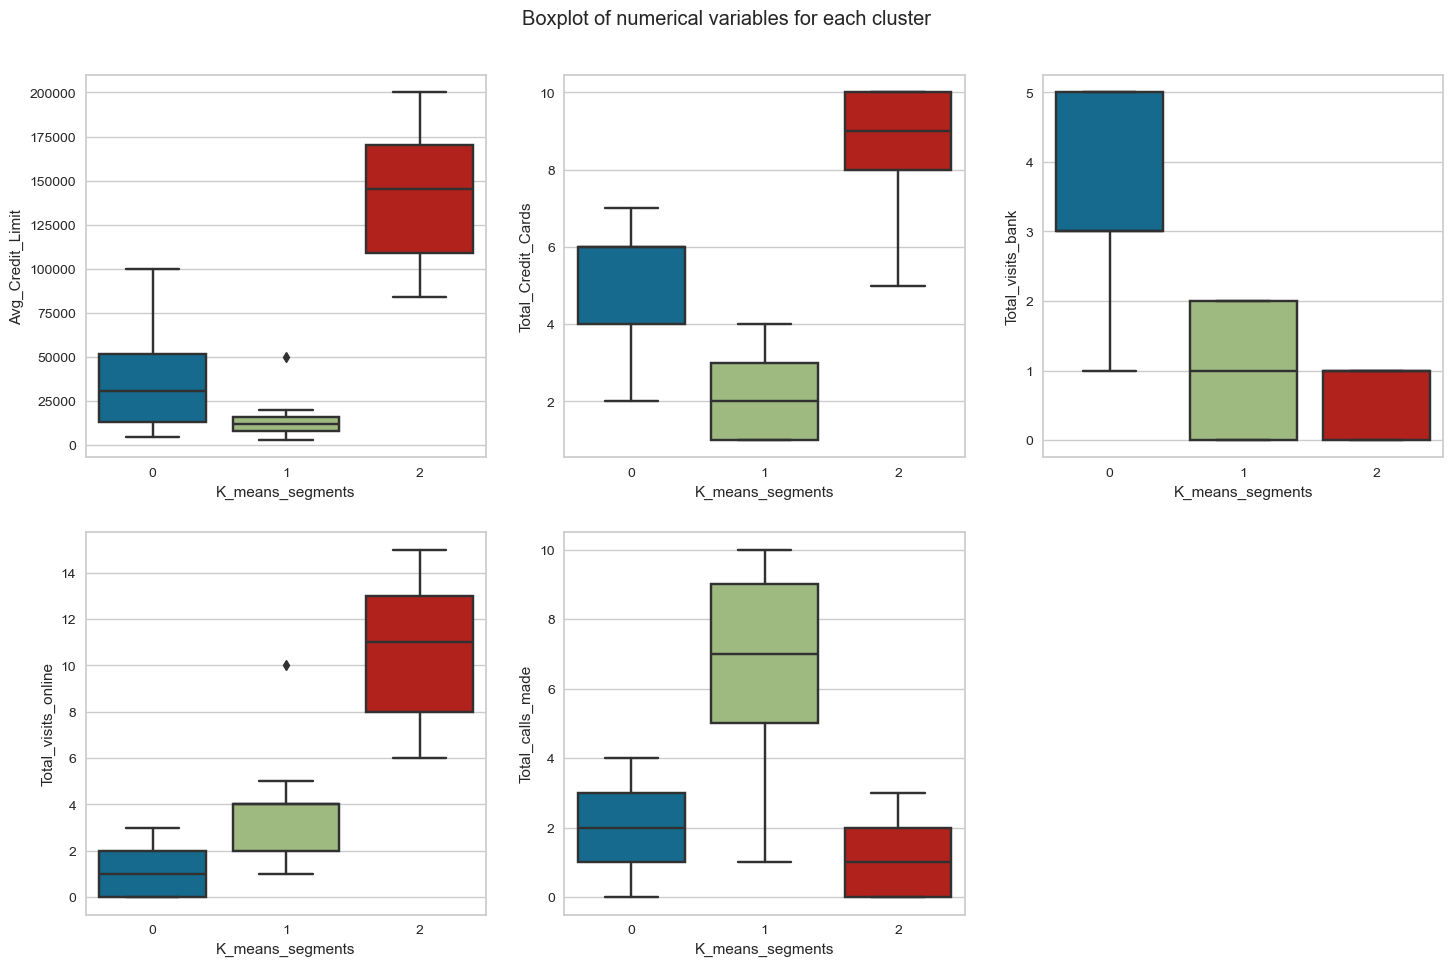

In [89]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

### Conclusion for K-Means Cluster

- Diverse Segments: The K-means method successfully segments customers into distinct groups based on financial capability and engagement preferences.
- Targeted Strategies: Each segment has unique needs, enabling the development of targeted strategies:
- Segment 0 for consistent revenue.
- Segment 1 for growth opportunities through support.
- Segment 2 for maximizing high-value customer retention.







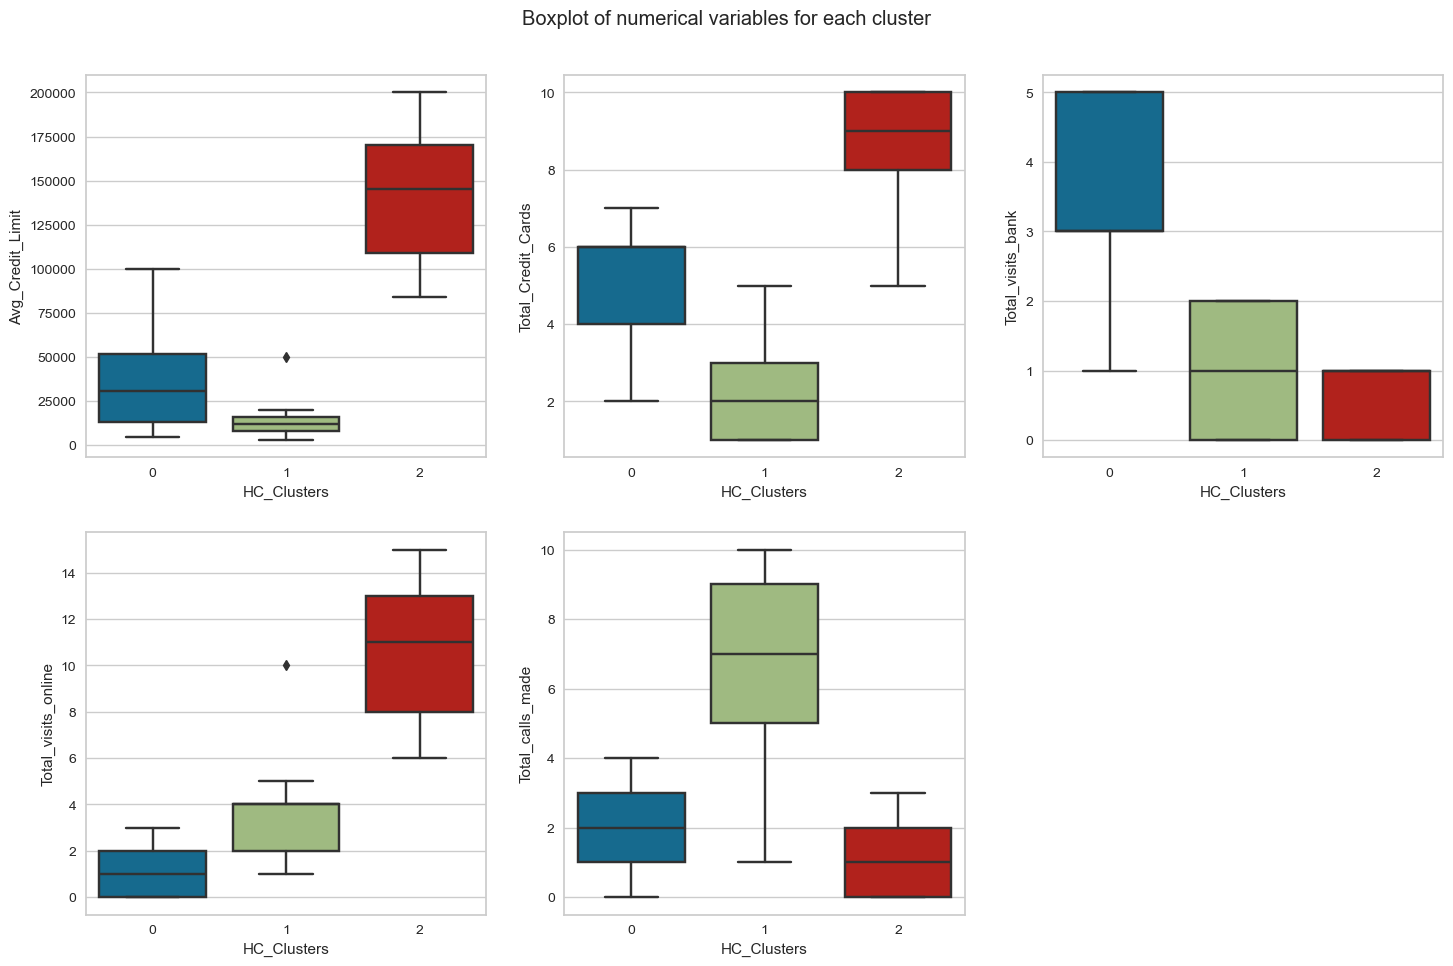

In [90]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### Conclusion for Hierarchial Cluster
- Distinct Segmentation: The hierarchical clustering successfully identifies three distinct customer groups, each with unique financial capabilities and engagement behaviors.
- Strategic Recommendations:
- Cluster 0 for stable, mixed engagement strategies.
- Cluster 1 for growth and support-focused initiatives.
- Cluster 2 for retention and high-value digital engagement.







### summary

#### K-means Clustering:

- Ideal for larger datasets, providing clear and easily interpretable clusters.
- Sensitive to outliers, which can skew results.
- Requires the number of clusters to be predetermined, which can affect outcomes if the choice is not optimal.

#### Hierarchical Clustering:

- Offers greater flexibility in terms of cluster shape and structure.
- Does not necessitate prior specification of the number of clusters, allowing for more exploratory analysis.
- May be less efficient for large datasets, as its computational complexity increases with size.
- Can result in complex interpretations when applied to extensive data, making it challenging to derive actionable insights.

### Add-on: PCA for Visualization

#### Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.


In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(subset_scaled_df)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 83.41% of the variance in the data.


<Axes: xlabel='Component 1', ylabel='Component 2'>

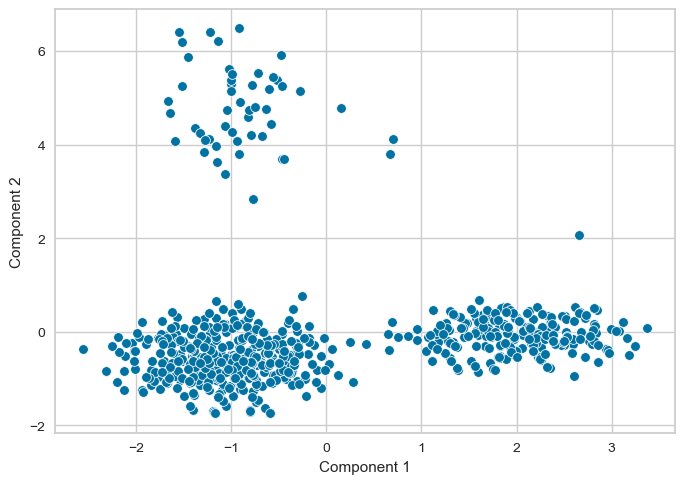

In [92]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

- The data points are clustered into three distinct groups: one large cluster in the bottom-left, another smaller cluster in the top-right, and a more spread-out group in between. 
- There is also an isolated point in the middle of the plot, above the main cluster.

<Axes: xlabel='Component 1', ylabel='Component 2'>

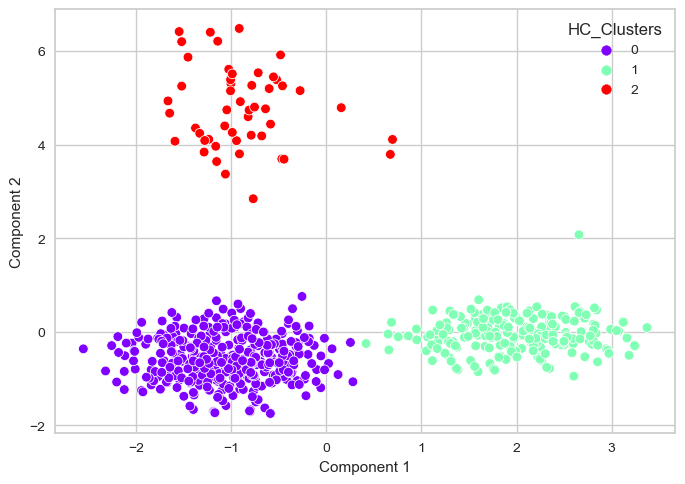

In [93]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["HC_Clusters"],
    palette="rainbow",
)

- Cluster 0 (purple): Positioned in the bottom-right area of the plot.
- Cluster 1 (light green): Located in the bottom-left and middle-left regions.
- Cluster 2 (red): Found in the top-right section of the plot.

<Axes: xlabel='Component 1', ylabel='Component 2'>

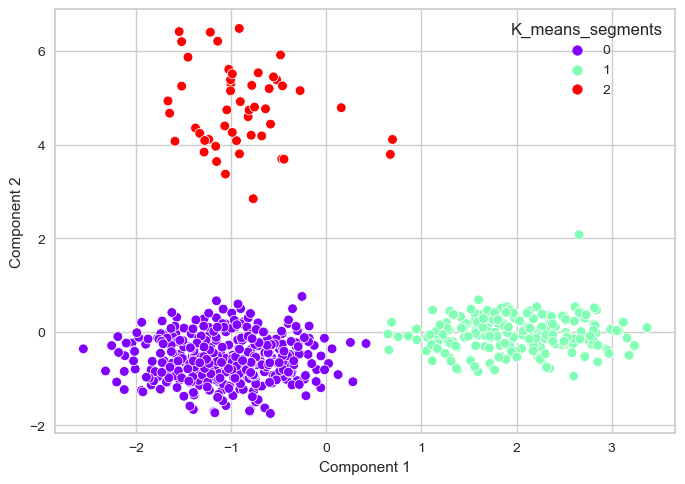

In [94]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["K_means_segments"],
    palette="rainbow",
)

- Cluster 0 (purple): This group is positioned in the bottom-left area of the plot.
- Cluster 1 (light green): This group is centered near the bottom-middle of the plot.
- Cluster 2 (red): This group is found in the top-right section of the plot.
- The K-means algorithm has successfully divided the data into three clusters, corresponding to the visible groups from the previous plot.
- The isolated points from the earlier plot are now included in the appropriate clusters, with one point in the purple segment (Cluster 0).

### COMPARISON OF K- MEANS AND HC CLUSTERING FOR PCA
When comparing K-means and hierarchical clustering, both methods generally identified the same three groups; however, there are slight differences in partitioning:

- Cluster 0 (purple): Contains a few additional points on the left compared to K-means.
- Cluster 1 (green): Includes more points in the upper-middle region.
- While the overall groups are similar, hierarchical clustering captures a slightly different structure in the transition areas between clusters, indicating a nuanced separation in these regions.

## Business Insights and Recommendations

### INSIGHTS
### Segment 2 (High-Value, Digital-Engaged Customers)
- Profile:
- Highest financial activity in terms of credit limits and credit card ownership.
- Strong preference for online interactions; minimal in-branch visits and phone calls.
- Actionable Insights:
- Enhance Digital Offerings: Provide premium digital services tailored to high-net-worth customers, such as virtual financial advisory, personalized financial insights, or exclusive online offers.
- Leverage Convenience: Introduce advanced self-service options like instant messaging with advisors, online investment management, and priority customer service for digital transactions.
- Build Loyalty Through Exclusivity: Offer digital-only rewards, early access to investment opportunities, or exclusive online events to strengthen engagement.
### Segment 1 (Moderate-Value, Physically Engaged Customers)
- Profile:
- Moderate financial activity, balancing between online and offline engagement.
- Frequent in-branch visits with steady online activity.
- Actionable Insights:
- Promote Hybrid Services: Offer services that integrate both in-person and online experiences, such as scheduled in-branch consultations followed by digital follow-ups.
- Targeted Promotions: Incentivize digital use for convenience while maintaining in-branch benefits. For example, discounts for in-person advisory sessions booked online.
- Personalized Communication: Use a multi-channel approach to reach this segment with reminders, offers, and updates on both online and offline channels.
###  Segment 0 (Low-Value, High-Contact Customers)
- Profile:
- Lower financial activity; primarily engages through phone calls and in-branch visits.
- Minimal use of online services.
- Actionable Insights:
- Encourage Digital Adoption: Introduce incentives for trying online services, such as discounts, free online banking tools, or simplified onboarding to mobile banking.
- Enhance In-Person Experience: Ensure a seamless, customer-friendly experience in branches with well-trained staff ready to assist, especially in handling routine transactions.
- Personalized Outreach: Provide tailored communications and follow-ups to encourage digital transitions, offering guidance for those less comfortable with digital platforms.

### RECOMMENDATION
- Increase Digital Engagement for High-Value Segments (Segment 2)
- Expand Digital Offerings: Introduce features like personalized app dashboards, AI-driven financial advisors, and high-limit credit products with rewards for online spending.
- Enhance Online Loyalty Programs: Offer loyalty benefits tied to digital usage, such as cash-back for online transactions, early access to digital investment products, or premium digital content.
- Promote Self-Service: Enable quick access to services like instant support chat and online investment tracking, reducing their need for in-branch visits.
- Provide Hybrid Service Models for Moderate-Value Customers (Segment 1)
- Cross-Channel Marketing: Highlight the benefits of digital convenience for routine tasks (e.g., transfers, bill payments) while reserving branch visits for complex needs.
- Complementary Tools: Encourage app use with features like appointment scheduling, transaction summaries, and alerts that enhance in-branch service experiences.
- Hybrid Service Options: Promote services that integrate digital convenience with in-person reassurance, such as setting up online consultations for follow-ups after in-branch meetings.
- Focus on Personalization for Low-Value, High-Contact Customers (Segment 0)
- Personalized Support: Assign dedicated relationship managers and offer robust phone-based customer support to meet their preference for human interaction.
- Introduce Digital Incentives: Offer onboarding programs with incentives like waived fees or discounts on online transactions to encourage mobile or web banking use.
- Streamline Digital Transitions: Simplify processes like online registration, making it easier for those hesitant about digital channels to get started.
- Enhance Customer Education (All Segments, with Emphasis on Segment 0)
- Educational Content: Provide resources on digital banking benefits, such as webinars, video tutorials, and one-on-one sessions to build comfort and familiarity.
- Targeted Outreach: Emphasize digital security, ease of access, and the efficiency of online tools in communications with segments less familiar with digital banking.
- Monitor Behavior for Future Segmentation
- Behavior Tracking: Regularly monitor engagement levels to detect shifts, especially in Segment 0, where digital adoption may increase over time.
- Dynamic Marketing Adjustments: Adjust marketing strategies to reflect changes in segment behavior and channel preferences, ensuring satisfaction across both digital and physical interactions.
- Optimize Resource Allocation: Use behavioral data to allocate resources effectively, prioritizing digital tool development for high-engagement segments and personalized service for high-contact customers.
- This approach should enhance customer satisfaction, boost digital service adoption, and optimize bank resources by aligning services with each segment’s preferences.

___